<a href="https://colab.research.google.com/github/olexy/da_ds_ml/blob/flatiron_Projects/Final_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting House Prices using the King County Housing Dataset
### By: Olalekan Hammed (Stephen)

In [1]:
# Google colab specific code
from google.colab import drive
drive.mount('/content/drive')
from google.colab import data_table
data_table.enable_dataframe_formatter()
#data_table.disable_dataframe_formatter()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


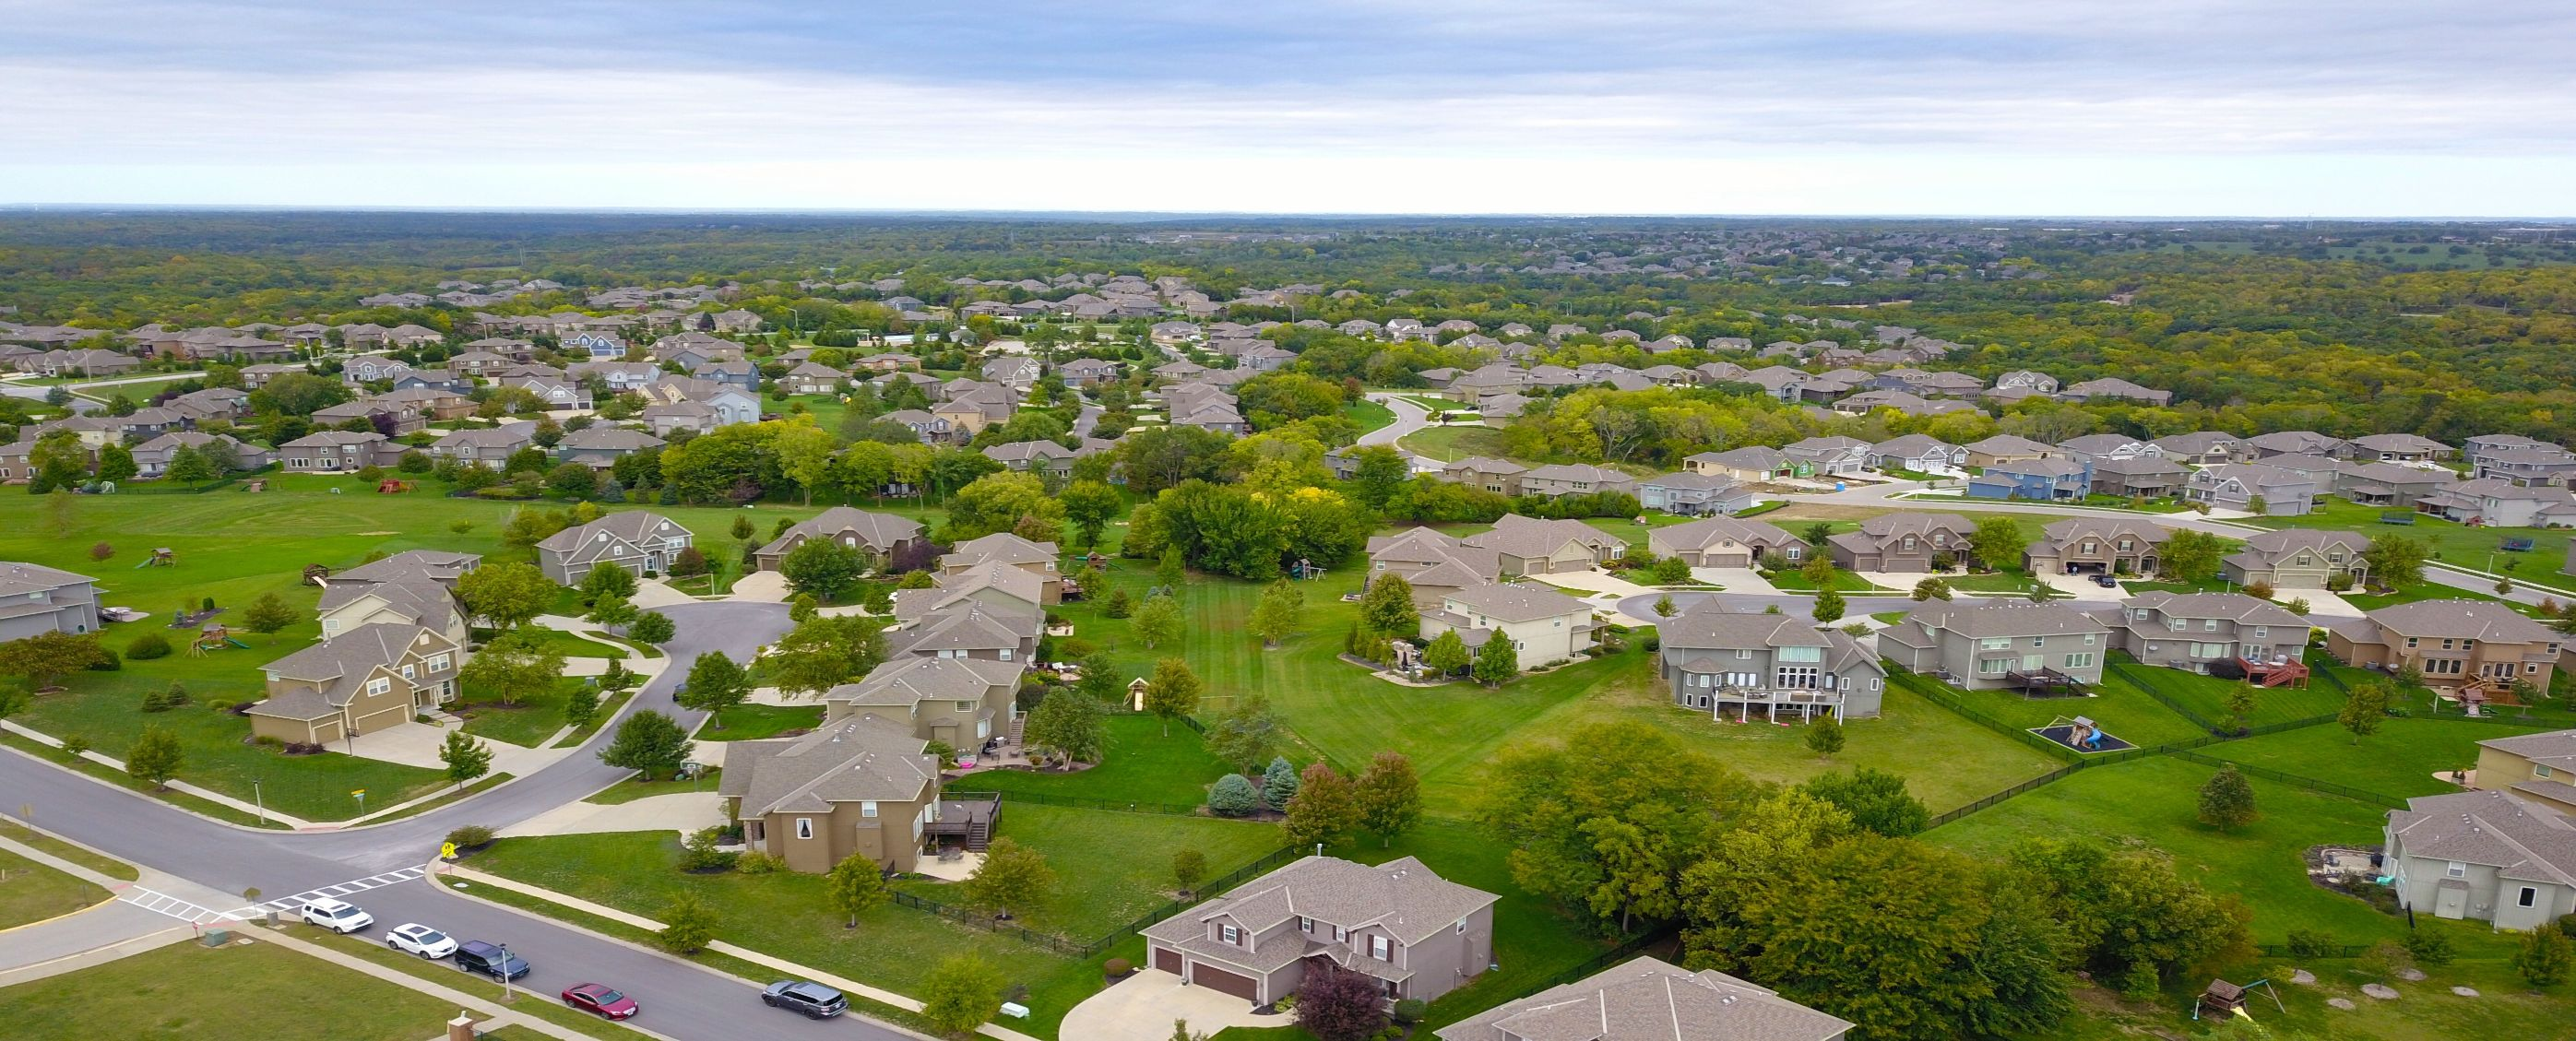

## Business Understanding
- The objective of this project is to model real estate prices in Kings County, 
Washington, USA. It is my intention that the model will be able to accurately predict housing prices based on a number of property variables provided within the dataset with which the model is built. 
- The expectation is that the model can be used by Real Estate investors and stakeholders operating in the Kings County area as a tool to guild financial and business decisions.

## Data Understanding
- We will be using the Kings County Housing dataset, kc_house_dataas provided by Flatiron School. The dataset contains 25 columns with inforamation about the size, location, condition, and other features of houses in King County. 
- One of the column is of the prices of the house and that will represent the ***dependent*** or ***target*** variable, that is, the column which value is to be predicted based on the other columns which are referred to as the ***independent*** or ***predictor*** variables. A full description of the dataset's columns can be found below:

- *id - unique identified for a house*

***Continous Variables***
- *price - sale price which is prediction target*
- *sqft_living - footage of the home*
- *sqft_lot - footage of the lot*
- *sqft_above - square footage of house apart from basement*
- *sqft_basement - square footage of the basement*
- *sqft_garage -  square footage of garage space*
- *sqft_patio - Square footage of outdoor porch or deck space*

**Categorical Variables**

*Intriniscially continous, but limited range so makes sense to categorize:*
- *bedrooms - of Bedrooms/House*
- *bathrooms - of bathrooms/bedrooms*
- *floors - floors (levels) in house*

*Strictly categorical:*
- *waterfront - whether the house is on a waterfront*
- *greenbelt - whether the house is adjacent to a green belt*     
- *nuisance  - whether the house has traffic noise or other recorded nuisances*
- *view - quality of view from house*
- *condition - how good the condition is ( Overall )*
- *grade - overall grade given to the housing unit, based on King County grading system*
- *heat_source  -  heat source for the house*
- *sewer_system -  sewer system for the house*

**Dates**
- *date - house was sold*
- *yr_built - year the house was built*
- *yr_renovated - year when house was renovated*

**Nominal**
- *address - the street address*
- *lat - Latitude coordinate*
- *long - Longitude coordinate*

## 1.0 Data Preparation

### 1.1 Loading the Data

In [2]:
#load required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

In [3]:
# set the max columns to none - redering all dataframe columns
pd.set_option('display.max_columns', None)

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Data Science/Flatiron/Phase 4/Project/kc_house_data.csv')
data.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7399300360   5/24/2022  675000.0         4        1.0         1180   
1  8910500230  12/13/2021  920000.0         5        2.5         2770   
2  1180000275   9/29/2021  311000.0         6        2.0         2880   
3  1604601802  12/14/2021  775000.0         3        3.0         2160   
4  8562780790   8/24/2021  592500.0         2        2.0         1120   

   sqft_lot  floors waterfront greenbelt nuisance     view condition  \
0      7140     1.0         NO        NO       NO     NONE      Good   
1      6703     1.0         NO        NO      YES  AVERAGE   Average   
2      6156     1.0         NO        NO       NO  AVERAGE   Average   
3      1400     2.0         NO        NO       NO  AVERAGE   Average   
4       758     2.0         NO        NO      YES     NONE   Average   

       grade  heat_source sewer_system  sqft_above  sqft_basement  \
0  7 Average          Gas       PUBLIC        1180              0   
1  7 Average          Oil       PUBLIC        1570           1570   
2  7 Average          Gas       PUBLIC        1580           1580   
3   9 Better          Gas       PUBLIC        1090           1070   
4  7 Average  Electricity       PUBLIC        1120            550   

   sqft_garage  sqft_patio  yr_built  yr_renovated  \
0            0          40      1969             0   
1            0         240      1950             0   
2            0           0      1956             0   
3          200         270      2010             0   
4          550          30      2012             0   

                                             address        lat       long  
0  2102 Southeast 21st Court, Renton, Washington ...  47.461975 -122.19052  
1  11231 Greenwood Avenue North, Seattle, Washing...  47.711525 -122.35591  
2  8504 South 113th Street, Seattle, Washington 9...  47.502045 -122.22520  
3  4079 Letitia Avenue South, Seattle, Washington...  47.566110 -122.29020  
4  2193 Northwest Talus Drive, Issaquah, Washingt...  47.532470 -122.07188

In [5]:
data.shape

(30155, 25)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

- The dataframe contains 25 columns and 30,155 rows. 
- Since **price** is the target variable and **id** is irrelevant, we have 23 features to construct the model.
- From this information, I can see that variables *heat_source* and *sewer_system* have null value
- In the Data Cleaning section below, I examine the proportions, get the value count, treat the missing values in each of the columns and  I drop the id column amongst other tasks.

## 2.0 Data Exploration

In [7]:
# get proportion of missing values
for column in data.columns:
  na_percent = (sum(data[column].isnull())/len(data[column])) * 100 
  print(column, round(na_percent, 2))

id 0.0
date 0.0
price 0.0
bedrooms 0.0
bathrooms 0.0
sqft_living 0.0
sqft_lot 0.0
floors 0.0
waterfront 0.0
greenbelt 0.0
nuisance 0.0
view 0.0
condition 0.0
grade 0.0
heat_source 0.11
sewer_system 0.05
sqft_above 0.0
sqft_basement 0.0
sqft_garage 0.0
sqft_patio 0.0
yr_built 0.0
yr_renovated 0.0
address 0.0
lat 0.0
long 0.0


In [8]:
# get descriptive statistics of df
round(data.describe(), 2)

id        price  bedrooms  bathrooms  sqft_living   sqft_lot  \
count  3.015500e+04     30155.00  30155.00   30155.00     30155.00    30155.0   
mean   4.538104e+09   1108535.84      3.41       2.33      2112.42    16723.6   
std    2.882587e+09    896385.66      0.98       0.89       974.04    60382.6   
min    1.000055e+06     27360.00      0.00       0.00         3.00      402.0   
25%    2.064175e+09    648000.00      3.00       2.00      1420.00     4850.0   
50%    3.874011e+09    860000.00      3.00       2.50      1920.00     7480.0   
75%    7.287100e+09   1300000.00      4.00       3.00      2619.50    10579.0   
max    9.904000e+09  30750000.00     13.00      10.50     15360.00  3253932.0   

         floors  sqft_above  sqft_basement  sqft_garage  sqft_patio  yr_built  \
count  30155.00    30155.00       30155.00     30155.00    30155.00  30155.00   
mean       1.54     1809.83         476.04       330.21      217.41   1975.16   
std        0.57      878.31         579.63       285.77      245.30     32.07   
min        1.00        2.00           0.00         0.00        0.00   1900.00   
25%        1.00     1180.00           0.00         0.00       40.00   1953.00   
50%        1.50     1560.00           0.00       400.00      150.00   1977.00   
75%        2.00     2270.00         940.00       510.00      320.00   2003.00   
max        4.00    12660.00        8020.00      3580.00     4370.00   2022.00   

       yr_renovated       lat      long  
count      30155.00  30155.00  30155.00  
mean          90.92     47.33   -121.32  
std          416.47      1.43      5.73  
min            0.00     21.27   -157.79  
25%            0.00     47.41   -122.33  
50%            0.00     47.55   -122.23  
75%            0.00     47.67   -122.12  
max         2022.00     64.82    -70.07

### 2.1 Data Cleaning



```
# Convert date column to datetime
```



In [9]:
# Convert date sold column to datetime in case we want to work with later 
data['date']=pd.to_datetime(data['date'])

The heat_source and sewer_system variables have missing values. Let's inspect the value counts for each of these columns.

In [10]:
data['heat_source'].value_counts()

Gas                  20583
Electricity           6465
Oil                   2899
Gas/Solar               93
Electricity/Solar       59
Other                   20
Oil/Solar                4
Name: heat_source, dtype: int64

In [11]:
print(data.heat_source.isna().sum())

32


In [12]:
data['sewer_system'].value_counts()

PUBLIC                25777
PRIVATE                4355
PRIVATE RESTRICTED        6
PUBLIC RESTRICTED         3
Name: sewer_system, dtype: int64

In [13]:
print(data.sewer_system.isna().sum())

14


Because **heat_source** and **sewer_system** have just 32 and 14 missing values respectively, and because they are categorical variables I decide to replace the missing values with **Gas** and **PUBLIC** being the categories with the highest number of entries respectively.

In [14]:
# replace missing values for heat_source
data['heat_source'].fillna('Gas', inplace=True)

In [15]:
# replace missing values for sewer_system
data['sewer_system'].fillna('PUBLIC', inplace=True)

In [16]:
# confirm that missing values have been taken care of
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
view             0
condition        0
grade            0
heat_source      0
sewer_system     0
sqft_above       0
sqft_basement    0
sqft_garage      0
sqft_patio       0
yr_built         0
yr_renovated     0
address          0
lat              0
long             0
dtype: int64

In [17]:
# checking uniqueness of the id column
data.shape[0] - data.id.nunique()

1

Since there just one duplicate in the **id** columns, which indicates perhaps that the particular buildng was sold twice or perhaps to data entry error, we can ignore and go ahead to remove the column as it unique identifier with relationship with the property as a feature.

In [18]:
# drop id column
data.drop(['id'], axis=1, inplace=True)

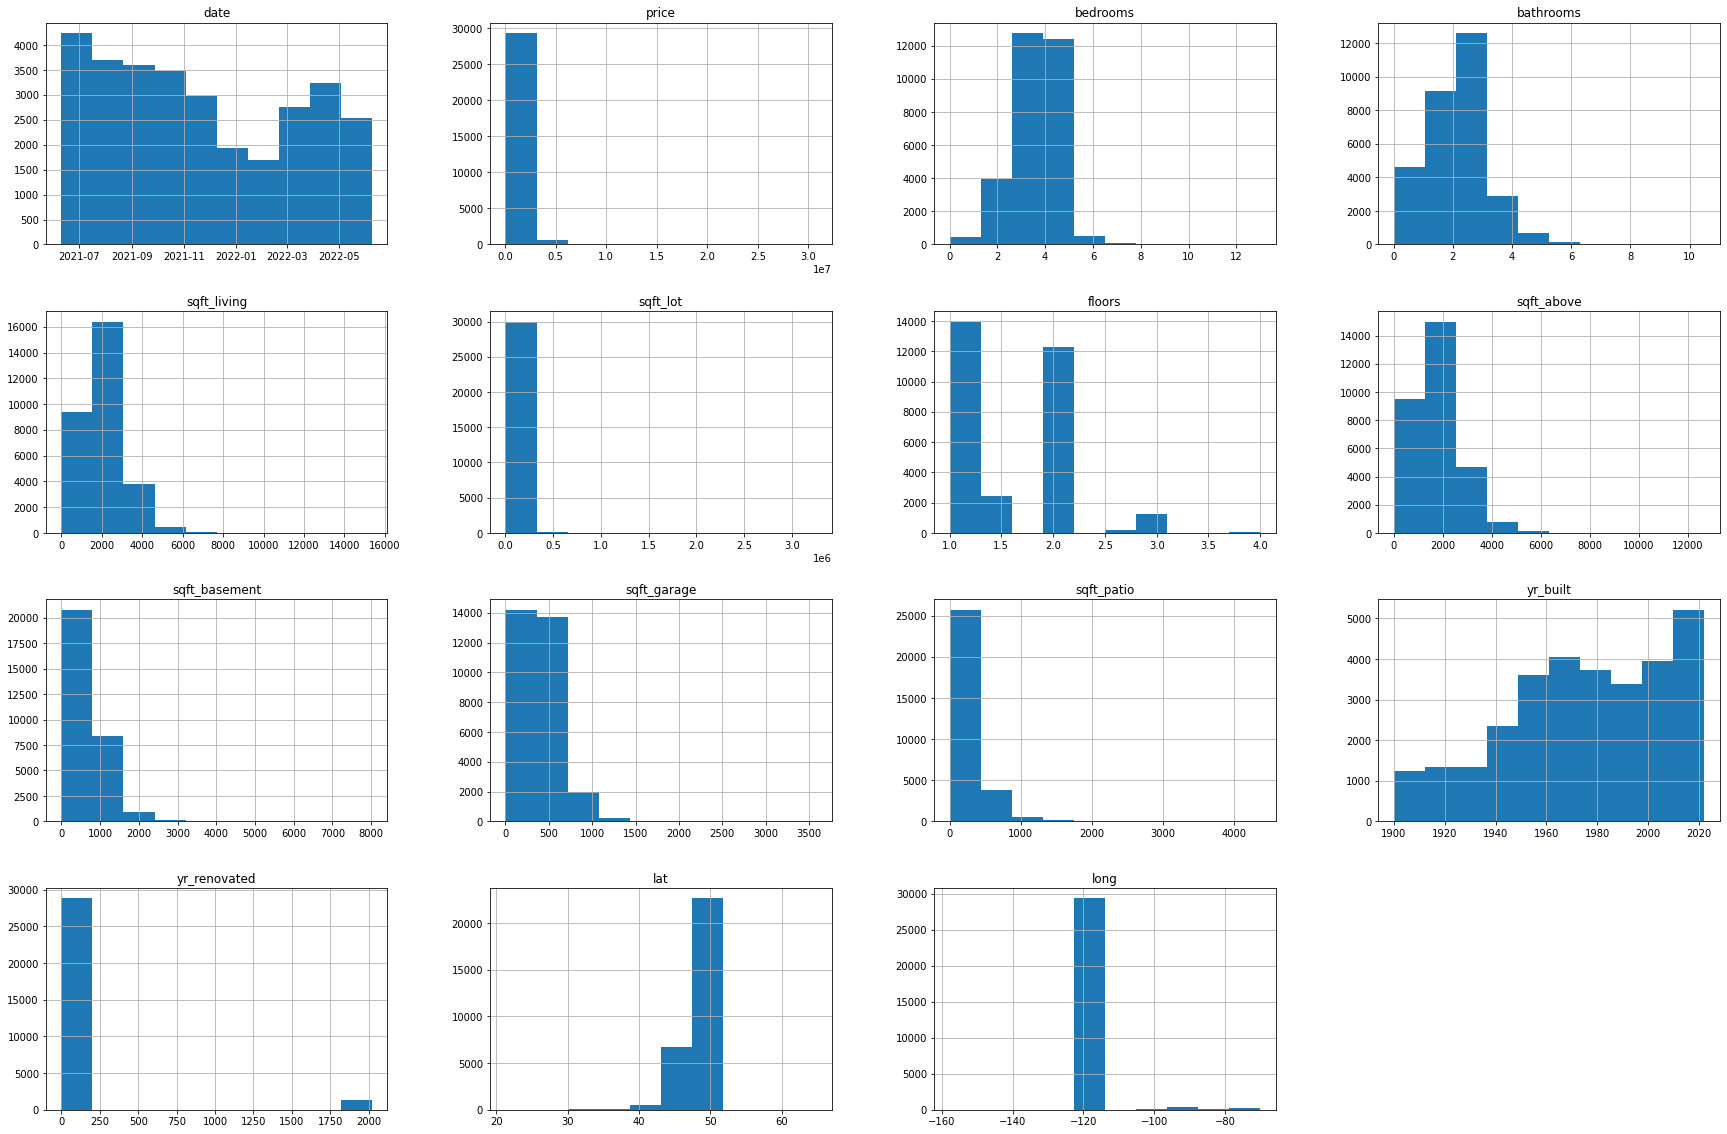

In [19]:
# look at histograms distributions
data.hist(figsize=(30,20));
plt.savefig('/content/drive/MyDrive/Colab Notebooks/images/histo_eda.png')

Preliminary observations from looking at histograms
- Most variables have outliers do not follow normal distribution 
- price is leptokurtic and heavily positively skewed with possible outliers
- bedrooms are mostly between 3 and 5 
- most houses have 3 bathrooms
- all sqft because most distributions are positively skewed with possible extreme outliers
- most houses have 1 floor
- most house were built between 2010 and 2020 but construction actually took off just before the 1940's 
- most homes have NOT been renovated given 0 - 200 as the renovated year

### 2.2 Feature Engineering
- Getting age by substracting the year of renovation from year of sale assuming renivation brings the house to a new state, otherwise i substract yoyear of built from year of sale years built

- Total land space by adding living and lot sqft

- Find the relationship with price



2.2.1 Feature Engineering 1 (Age)
```
# In trying to checking the existence of relationship between the age of a house and the price, 
I create a column age: by subtracting yr_built from date (of sale)
```



In [20]:
# create column age
sale_year = data.date.apply(lambda x: x.year)
data['age'] = np.where(data['yr_renovated'] !=0, sale_year - data['yr_renovated'], sale_year - data['yr_built'])

In [21]:
data.head(2)

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0 2022-05-24  675000.0         4        1.0         1180      7140     1.0   
1 2021-12-13  920000.0         5        2.5         2770      6703     1.0   

  waterfront greenbelt nuisance     view condition      grade heat_source  \
0         NO        NO       NO     NONE      Good  7 Average         Gas   
1         NO        NO      YES  AVERAGE   Average  7 Average         Oil   

  sewer_system  sqft_above  sqft_basement  sqft_garage  sqft_patio  yr_built  \
0       PUBLIC        1180              0            0          40      1969   
1       PUBLIC        1570           1570            0         240      1950   

   yr_renovated                                            address        lat  \
0             0  2102 Southeast 21st Court, Renton, Washington ...  47.461975   
1             0  11231 Greenwood Avenue North, Seattle, Washing...  47.711525   

        long  age  
0 -122.19052   53  
1 -122.35591   71

In [22]:
# check and verify dataty of age column is int.
data['age'].dtype

dtype('int64')

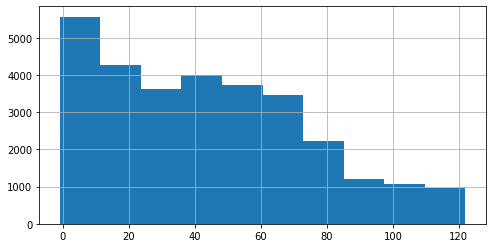

In [23]:
data['age'].hist(figsize=(8,4));
plt.savefig('/content/drive/MyDrive/Colab Notebooks/images/histo_age.png')

##### 2.2.1.0 Review relationship between Price and age.



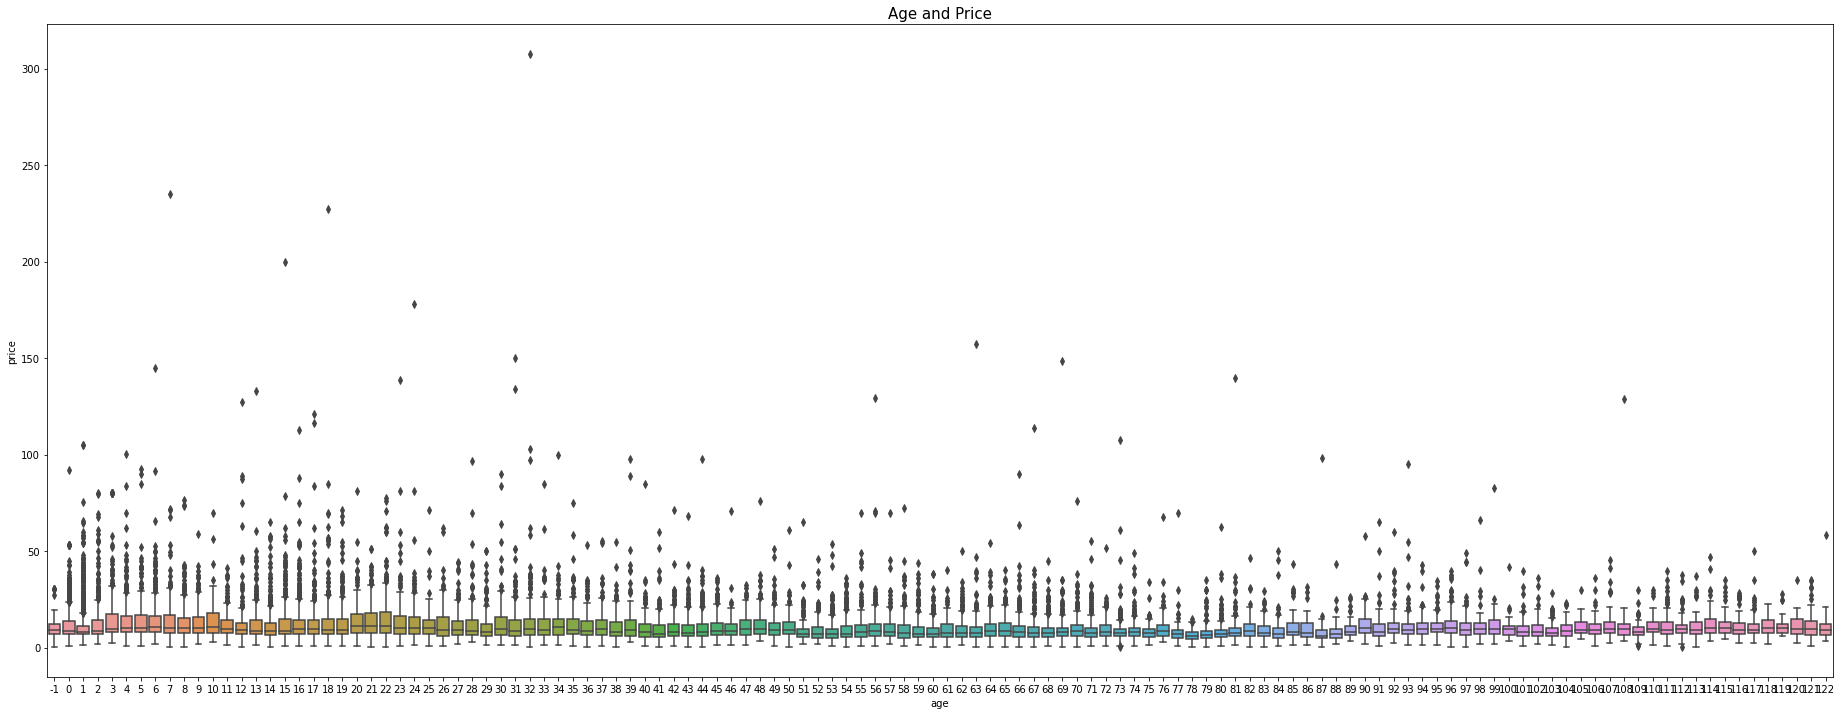

In [24]:
# age vs price
var = 'age'
grade_vs_price = pd.concat([data['price'] / 100_000, data[var]], axis=1)
fig, ax = plt.subplots(figsize=(32,12))
fig = sns.boxplot(x=var, y='price', data=grade_vs_price)
plt.title('Age and Price', fontsize=15, fontname='silom')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/images/age_vs_price.png')

#plot_cat_vars('age','age_vs_price')



```
# The newer houses tend to have a higher price range as well higher mean prices 
There are houses with negative year, this suggest that either the built year or renovated year is later that year of sale, this is probabably dat entry error.
```



2.2.2 Feature Engineering 2 (Total Land Space)
```
# In trying to checking the existence of relationship between the total land square footage of a house and the price, 
I create a column total_sqft: by adding sqft_living to sqft_lot 
```

In [25]:
data['total_sqft'] = data['sqft_living'] + data['sqft_lot']

In [26]:
data.head(2)

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0 2022-05-24  675000.0         4        1.0         1180      7140     1.0   
1 2021-12-13  920000.0         5        2.5         2770      6703     1.0   

  waterfront greenbelt nuisance     view condition      grade heat_source  \
0         NO        NO       NO     NONE      Good  7 Average         Gas   
1         NO        NO      YES  AVERAGE   Average  7 Average         Oil   

  sewer_system  sqft_above  sqft_basement  sqft_garage  sqft_patio  yr_built  \
0       PUBLIC        1180              0            0          40      1969   
1       PUBLIC        1570           1570            0         240      1950   

   yr_renovated                                            address        lat  \
0             0  2102 Southeast 21st Court, Renton, Washington ...  47.461975   
1             0  11231 Greenwood Avenue North, Seattle, Washing...  47.711525   

        long  age  total_sqft  
0 -122.19052   53        8320  
1 -122.35591   71        9473

In [27]:
# check and verify datatype of total_sqft column is int.
data['total_sqft'].dtype

dtype('int64')

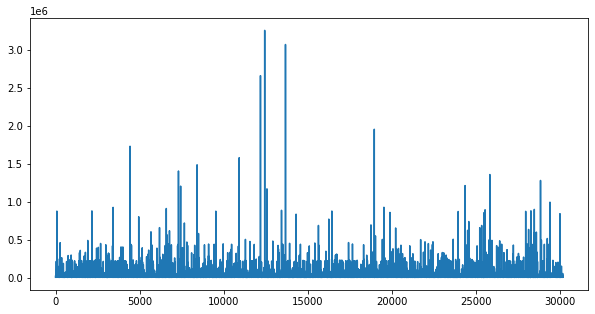

In [28]:
plt.figure(figsize=(10,5))
plt.plot(data['total_sqft'])
plt.savefig('/content/drive/MyDrive/Colab Notebooks/images/histo_totalsqft.png')

##### 2.2.2.0 Review relationship between Total land Sqft and Price.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


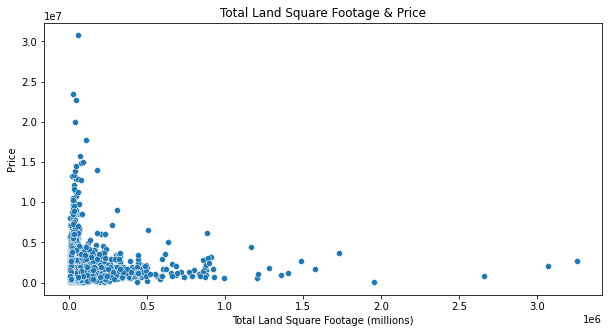

In [29]:
plt.figure(figsize=(10,5))
plt.title('Total Land Square Footage & Price')
plt.xlabel('Total Land Square Footage (millions)')
plt.ylabel('Price')
sns.scatterplot(data['total_sqft'],data['price'])
plt.savefig('/content/drive/MyDrive/Colab Notebooks/images/totalsqft_vs_price.png');

2.2.3 Feature Engineering 3 (Zipcode)
```
# I want to extract zipcode as predictor from the address column
```

In [30]:
#Extract zipcode from address
data['zipcode'] = data['address'].str.findall(r'([0-9]\d+)').apply(lambda x: x[-1] if len(x) >= 1 else '')

In [31]:
#Output zicode range
print(data['zipcode'].astype('int').min())
print(data['zipcode'].astype('int').max())

1541
99705


In [32]:
#filtering for valid zip codes
data = data[(data['zipcode'].astype('int') >= 98000) & (data['zipcode'].astype('int') < 99000)]

In [33]:
#Output zicode range to confirm filtering
print(data['zipcode'].astype('int').min())
print(data['zipcode'].astype('int').max())

98001
98663


In [34]:
data.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0 2022-05-24  675000.0         4        1.0         1180      7140     1.0   
1 2021-12-13  920000.0         5        2.5         2770      6703     1.0   
2 2021-09-29  311000.0         6        2.0         2880      6156     1.0   
3 2021-12-14  775000.0         3        3.0         2160      1400     2.0   
4 2021-08-24  592500.0         2        2.0         1120       758     2.0   

  waterfront greenbelt nuisance     view condition      grade  heat_source  \
0         NO        NO       NO     NONE      Good  7 Average          Gas   
1         NO        NO      YES  AVERAGE   Average  7 Average          Oil   
2         NO        NO       NO  AVERAGE   Average  7 Average          Gas   
3         NO        NO       NO  AVERAGE   Average   9 Better          Gas   
4         NO        NO      YES     NONE   Average  7 Average  Electricity   

  sewer_system  sqft_above  sqft_basement  sqft_garage  sqft_patio  yr_built  \
0       PUBLIC        1180              0            0          40      1969   
1       PUBLIC        1570           1570            0         240      1950   
2       PUBLIC        1580           1580            0           0      1956   
3       PUBLIC        1090           1070          200         270      2010   
4       PUBLIC        1120            550          550          30      2012   

   yr_renovated                                            address        lat  \
0             0  2102 Southeast 21st Court, Renton, Washington ...  47.461975   
1             0  11231 Greenwood Avenue North, Seattle, Washing...  47.711525   
2             0  8504 South 113th Street, Seattle, Washington 9...  47.502045   
3             0  4079 Letitia Avenue South, Seattle, Washington...  47.566110   
4             0  2193 Northwest Talus Drive, Issaquah, Washingt...  47.532470   

        long  age  total_sqft zipcode  
0 -122.19052   53        8320   98055  
1 -122.35591   71        9473   98133  
2 -122.22520   65        9036   98178  
3 -122.29020   11        3560   98118  
4 -122.07188    9        1878   98027

In [35]:
# check and verify datatype of total_sqft column is int.
data['zipcode'].dtype

dtype('O')

##### 2.2.3.0 Review relationship between Zipcodes and Price.

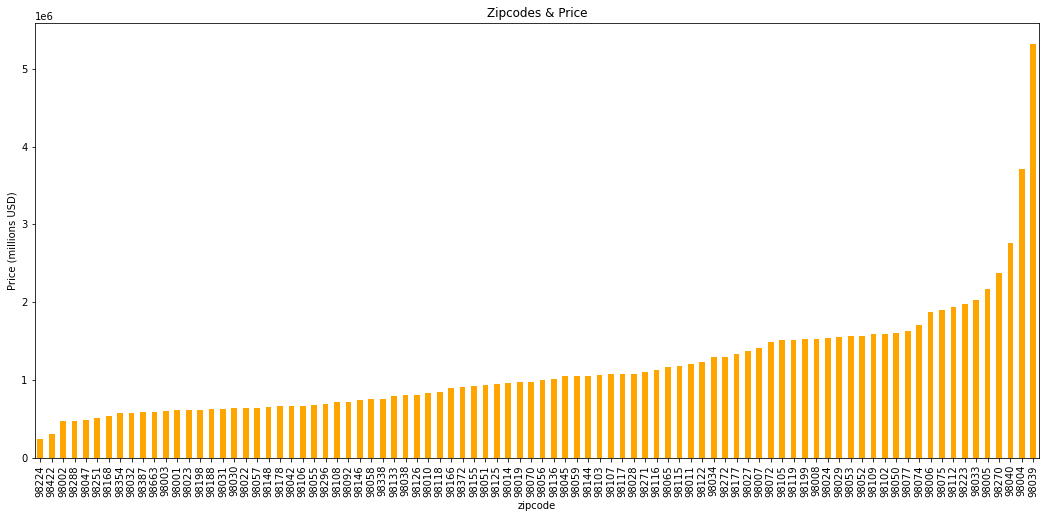

In [36]:
plt.figure(figsize=(18,8))
plt.title('Zipcodes & Price')
plt.xlabel('Zipcodes')
plt.ylabel('Price (millions USD)')
data.groupby(data['zipcode'].astype('int')).price.mean().sort_values(ascending=True).plot(kind='bar', color='orange')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/images/zipcodes_vs_price.png');

## 3.0 Modeling

### 3.1 Baseline Model
```
# Build a model that does not include the categorical variables as well as without much preparation of the data as the baseline model.
#Lat and long are of no relevance because they are not usual factors to consider when purchasing houses.
```

In [37]:
preds_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_above','sqft_basement','sqft_garage', 'sqft_patio','yr_built', 'yr_renovated','age', 'total_sqft']

In [38]:
y = data['price']
X = data[preds_cols]

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [39]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     1802.
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        00:36:23   Log-Likelihood:            -4.3414e+05
No. Observations:               29241   AIC:                         8.683e+05
Df Residuals:                   29228   BIC:                         8.684e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.553e+06   1.54e+06     -2.948

Evaluating Mean Absolute Error & Root Mean Square Error

In [40]:
# Define function for linear regression
# Use fitted model to generate predictions for 
def lin_reg(X, y):
    linreg = LinearRegression()  
    linreg.fit(X, y)
    y_hat = linreg.predict(X)
    print('R_squared Score:', linreg.score(X, y))
    print('Mean Absolute Error:', mae(y, y_hat))
    print('Root Mean Squared Error test:', np.sqrt(mse(y, y_hat)))
    return linreg
lin_reg(X,y)

R_squared Score: 0.42517298775582735
Mean Absolute Error: 383793.96533640183
Root Mean Squared Error test: 678810.627904596


LinearRegression()

#### Interpretation
- Our model is responsible for 43% in price variability
- Model is good overall because the p-value less that 0.05
- Some of the Coefficients:
  - If all predictors, price will be `553,000 USD`
  - For every 1 increase in bedroom, we have `66,600 USD` increase in prices
  - For every 1 increase in bathroom, we have `145,300 USD`increase in prices
  - For every sqft increase in sqft_living, we have `217.85 USD` increase in 
  prices
  - For every sqft increase in total land space (total_sqft), we have `108.88 USD` increase in prices
- The result shows our baseline model is off by `383,794 USD`

## 4.0 Data Preparation for Model Iteration

### 4.1 Checking the probability density function for numeric variables

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


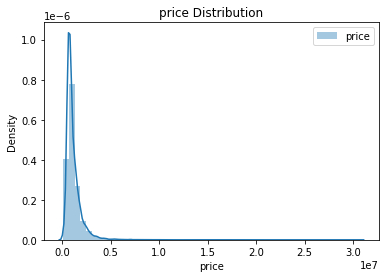

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


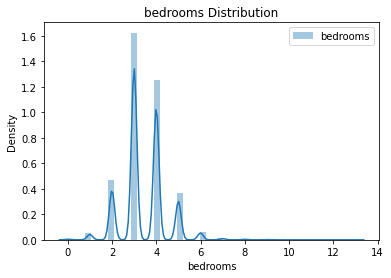

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


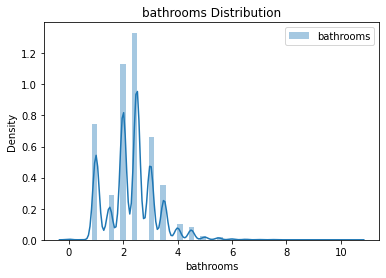

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


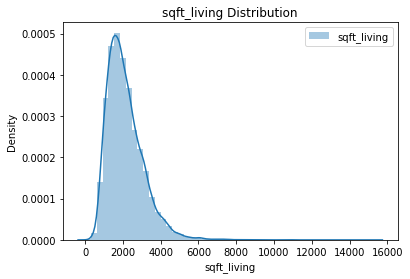

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


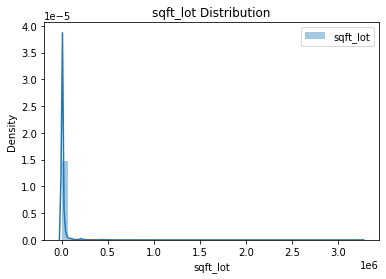

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


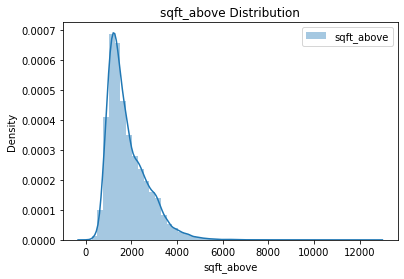

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


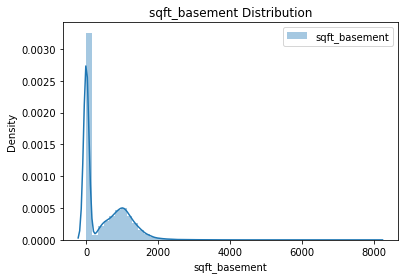

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


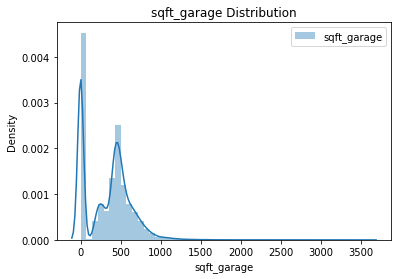

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


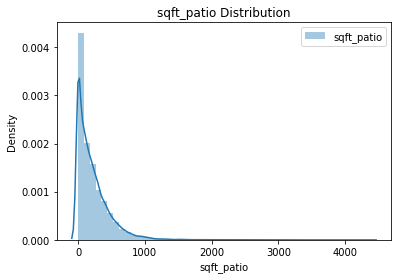

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


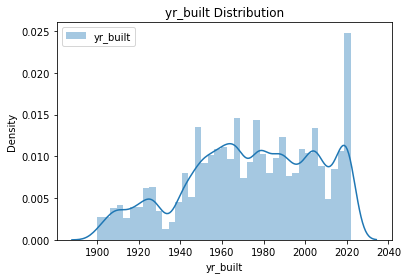

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


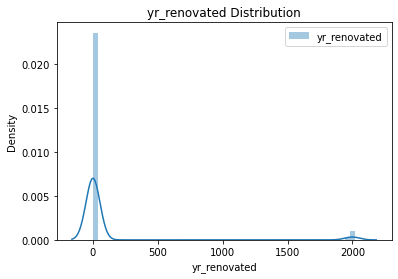

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


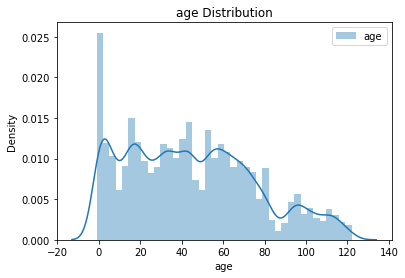

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


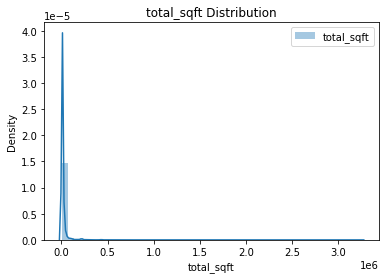

In [41]:
# #kernel density functions
cont_var = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','sqft_above', 'sqft_basement',
       'sqft_garage', 'sqft_patio', 'yr_built', 'yr_renovated','age', 'total_sqft']
def plot_histkde(data, columns):
    for column in columns:
        sns.distplot(data[column], label=column)
        plt.title (column + ' Distribution')
        plt.legend()
        plt.savefig('/content/drive/MyDrive/Colab Notebooks/images/k_density_'+column+'.png')
        plt.show();
plot_histkde(data, cont_var);

Observations
- The distributions show heavy positive skeweness.
- Some distributions appear to be multimodal.

### 4.2 Identifying Outliers

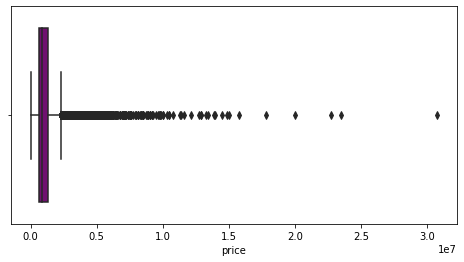

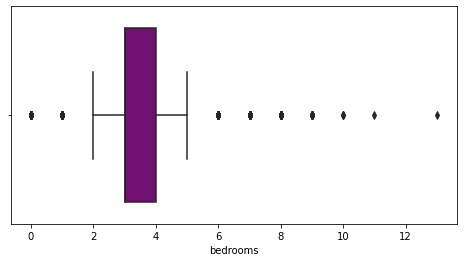

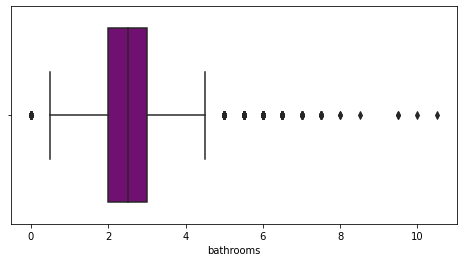

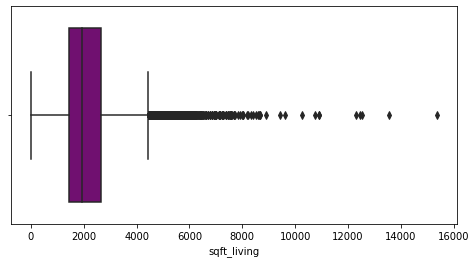

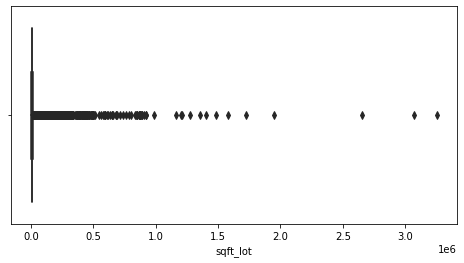

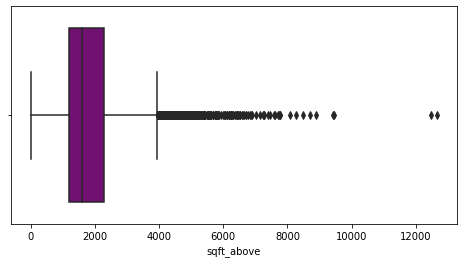

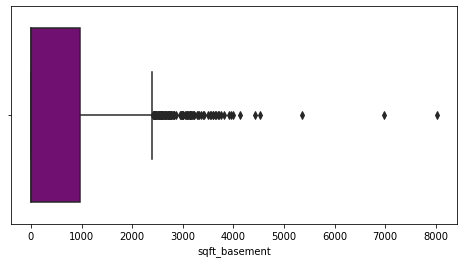

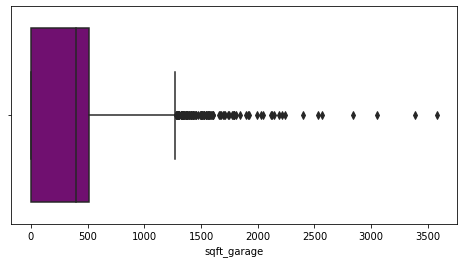

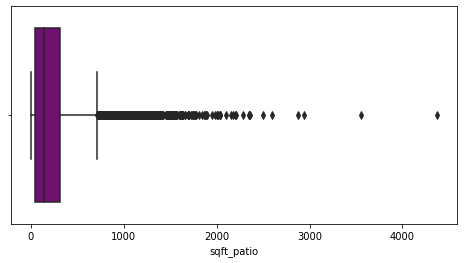

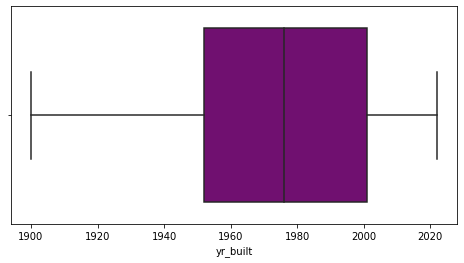

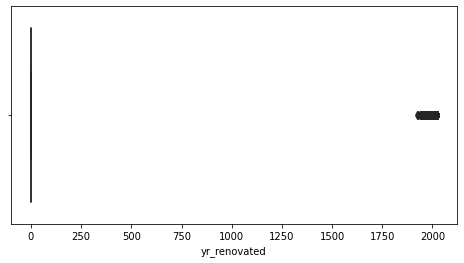

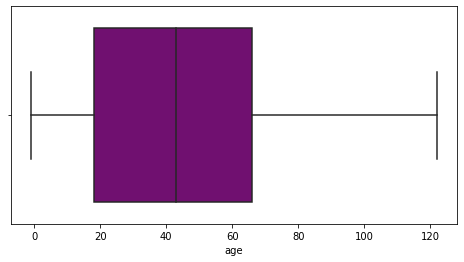

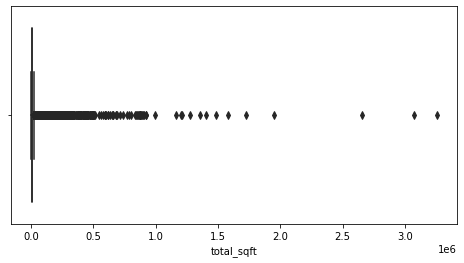

In [42]:
#Visualising numeric variables
cont_var = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','sqft_above', 'sqft_basement',
       'sqft_garage', 'sqft_patio', 'yr_built', 'yr_renovated','age', 'total_sqft']
def outlier_viz(columns):
    for column in columns:
      fig = plt.figure(figsize=(8,4))    
      sns.boxplot(x=data[column], color='purple')
      plt.savefig('/content/drive/MyDrive/Colab Notebooks/images/'+column+'_outlier.png')
outlier_viz(cont_var);

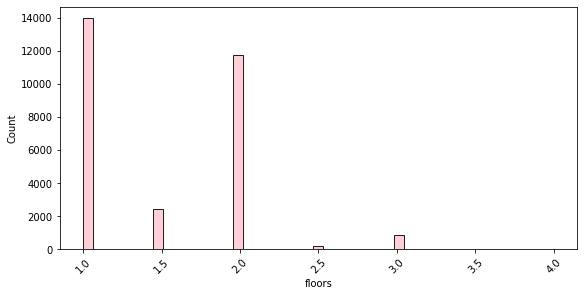

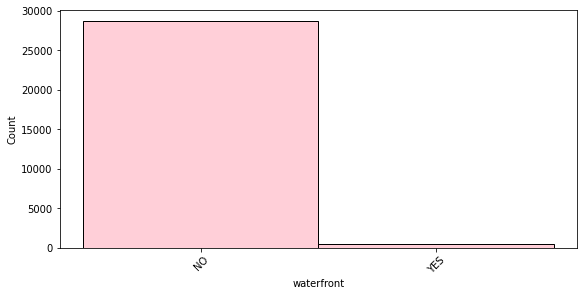

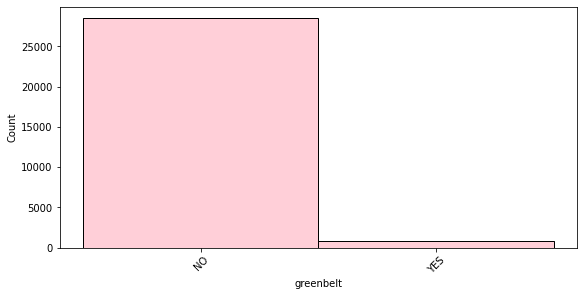

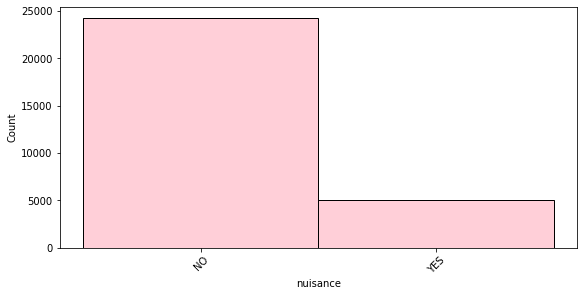

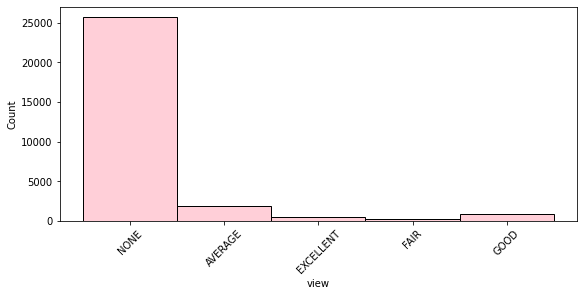

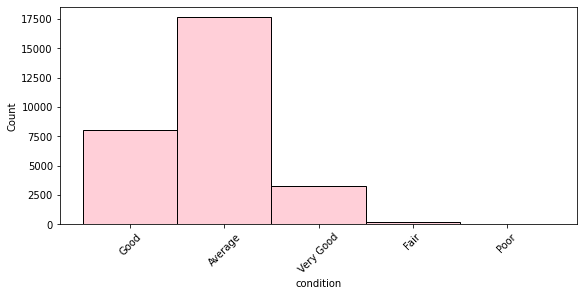

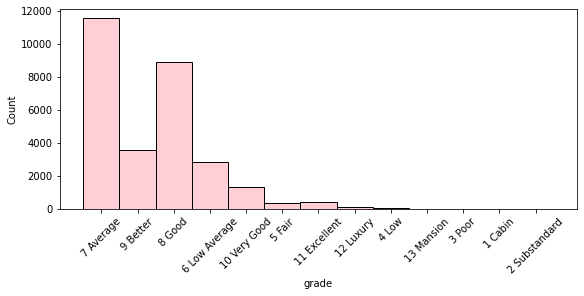

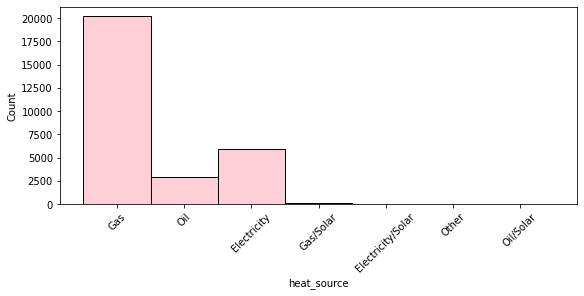

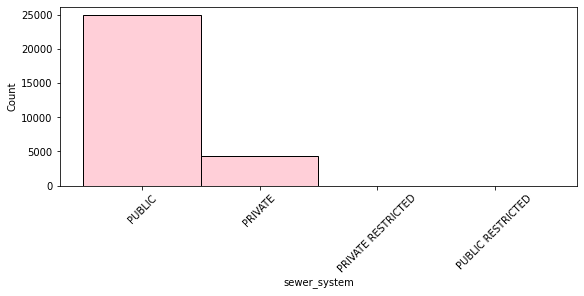

In [43]:
#Visualising categorical variables
cat_var = ['floors', 'waterfront', 'greenbelt', 'nuisance', 'view', 'condition','grade', 'heat_source', 'sewer_system']
def cat_outlier_viz(columns):
  for column in columns:
    #fig = plt.figure(figsize=(20,8))
    fig = plt.figure(constrained_layout=True, figsize=(8,4))
    sns.histplot(data=data, x=data[column], color="pink")
    plt.xticks(rotation=45)
    # sns.catplot(data=data, x=data[column], kind="count", palette="ch:.25")
      # data[column].hist(figsize=(50,30));
    plt.savefig('/content/drive/MyDrive/Colab Notebooks/images/'+column+'cat_outlier.png')
cat_outlier_viz(cat_var)

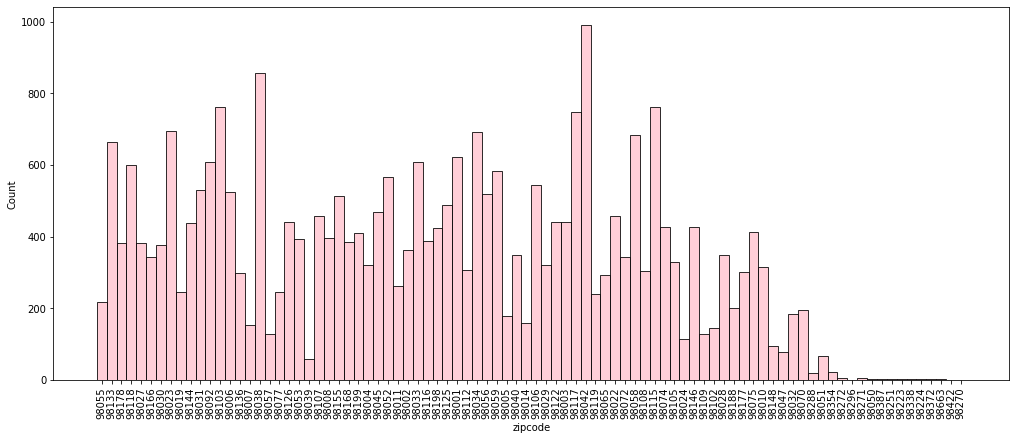

In [44]:
fig = plt.figure(constrained_layout=True, figsize=(14,6))
sns.histplot(data=data, x=data['zipcode'], color="pink")
plt.xticks(rotation=90)
# sns.catplot(data=data, x=data[column], kind="count", palette="ch:.25")
plt.savefig('/content/drive/MyDrive/Colab Notebooks/images/zipcode_cat_outlier.png')

#### 4.2.1 Dealing with Outliers

- In dealing with outliers, I had a `For-Loop` in the exploratory notebook to list the value counts on the variables

- I'll use the 1.5 IQR rule and descriptve statistics of the columns to determine and remove the outliers.

- `IQR` stands for Inter-Quartile Rang also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q₃ − Q₁. *Source: Wikipedia*

In [45]:
#Make a copy of dataset
#Create new dataframe for transformations
data_clean = data.copy()

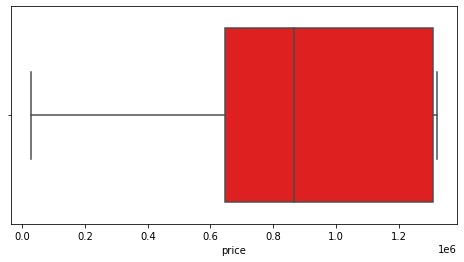

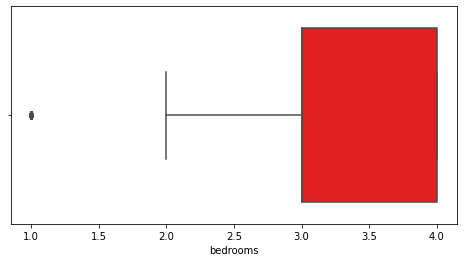

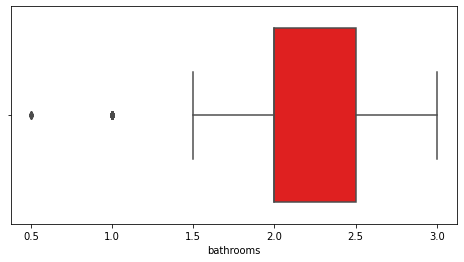

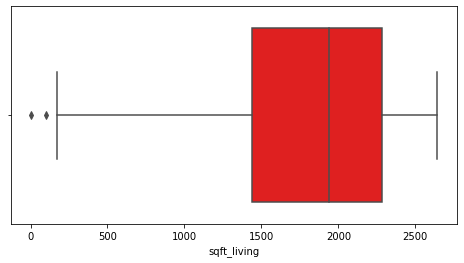

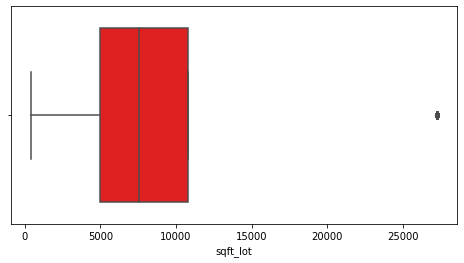

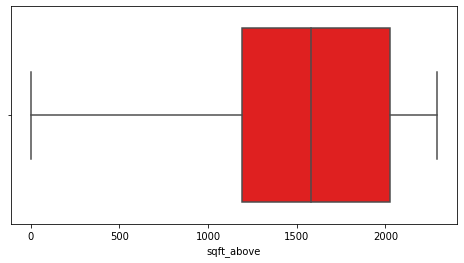

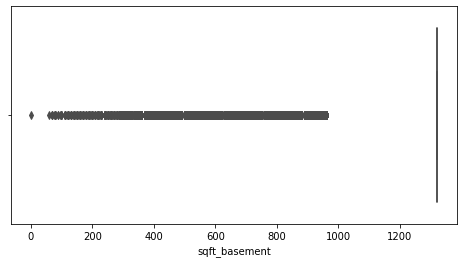

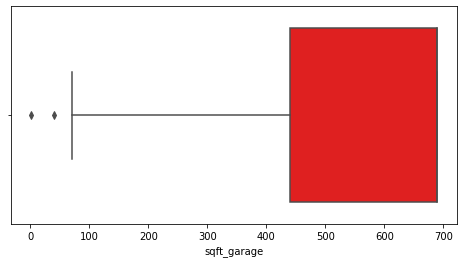

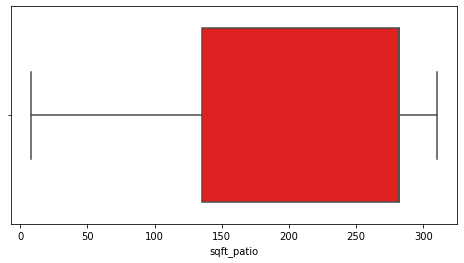

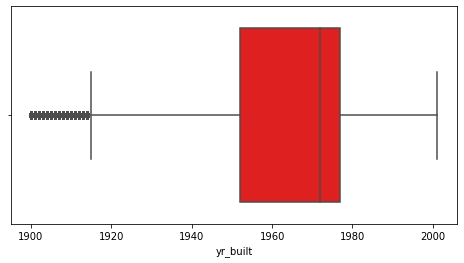

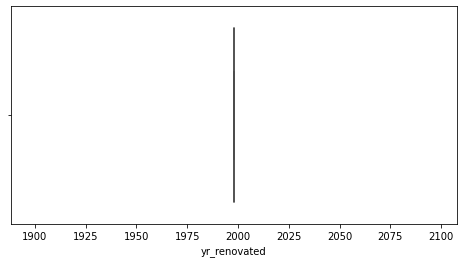

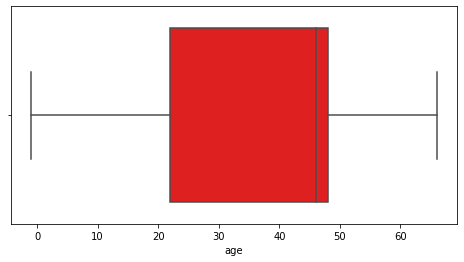

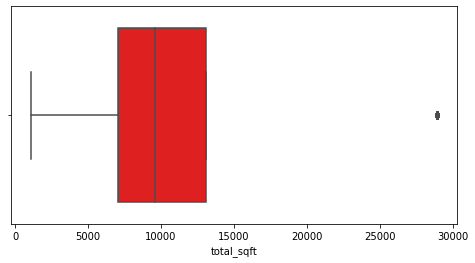

In [46]:
#Removing outliers in the numeric variables
#using IQR
def outlier_iqr(columns):
  for column in columns:
    Q1 = data_clean[column].quantile(0.25)
    Q3 = data_clean[column].quantile(0.75)
    IQR = Q3 - Q1
    mean_outliers = data_clean.loc[(data_clean[column] > Q3) | (data_clean[column] < Q1), column].mean()
    round(mean_outliers,0)
    data_clean[column] = np.where((data_clean[column] > Q3 ) | (data_clean[column] == 0), round(mean_outliers), data_clean[column])
    fig = plt.figure(figsize=(8,4))    
    sns.boxplot(x=data_clean[column], color="red")
    plt.savefig('/content/drive/MyDrive/Colab Notebooks/images/'+column+'_outlier_fixed.png')
    #print('The Inter-quartile range for '+column+' spread is' + str(IQR))
outlier_iqr(cont_var);

As shown above, I take the range of bedrooms to be between 1 and 6

In [47]:
# get descriptive statistics of bedrooms column
#data['bedrooms'].describe()

In [48]:
#data_clean['bedrooms'].describe()

### 4.3 Apply log transformation for positively skewed data based on the probability density function above
```
# At this point and before any transformations, I will proceed to save my new partially preprocessed and clean dataset. 
This will enable me to come back to the raw data in case it is needed later on.
```



In [49]:
#Save partially clean copy of the dataframe to file
data_clean.to_csv('KingsCounty_Clean.csv')
#Create new dataframe for transformations
data_trans = data_clean.copy()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


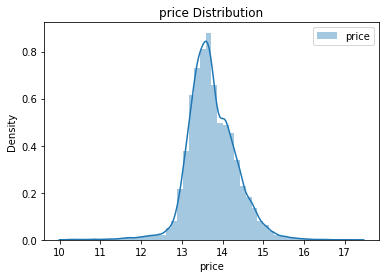

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


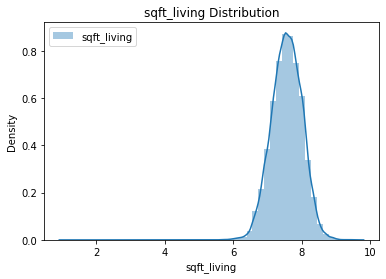

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


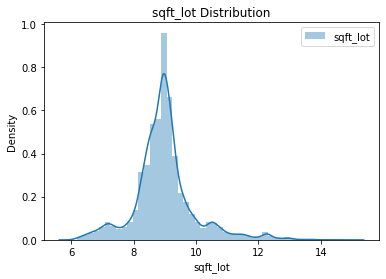

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


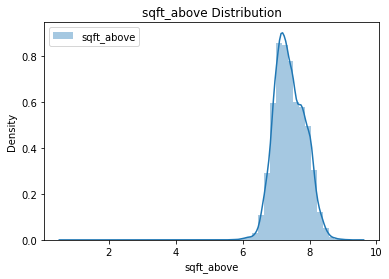

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


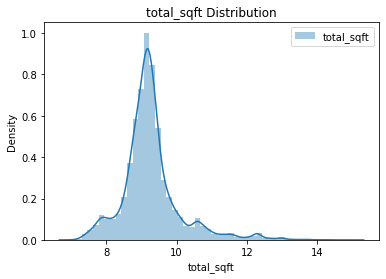

In [50]:
#log transformation for the relevant numeric variables
trans_log = ['price','sqft_living','sqft_lot','sqft_above','total_sqft']
for col in trans_log:
    data_trans[col]=np.log(data[col])
plot_histkde(data_trans, trans_log)

### 4.4 Check for multicolinearity

In [51]:
# generate copy of data without target variable (price), date, address, zipcode and lat/lon to perform multicolinearity check
data_pred = data_trans.drop(['date', 'price', 'address', 'zipcode','lat', 'long'], axis=1)
data_pred.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors waterfront greenbelt  \
0         4        1.0     7.073270  8.873468     1.0         NO        NO   
1         3        2.5     7.926603  8.810310     1.0         NO        NO   
2         3        2.0     7.965546  8.725182     1.0         NO        NO   
3         3        3.0     7.677864  7.244228     2.0         NO        NO   
4         2        2.0     7.021084  6.630683     2.0         NO        NO   

  nuisance     view condition      grade  heat_source sewer_system  \
0       NO     NONE      Good  7 Average          Gas       PUBLIC   
1      YES  AVERAGE   Average  7 Average          Oil       PUBLIC   
2       NO  AVERAGE   Average  7 Average          Gas       PUBLIC   
3       NO  AVERAGE   Average   9 Better          Gas       PUBLIC   
4      YES     NONE   Average  7 Average  Electricity       PUBLIC   

   sqft_above  sqft_basement  sqft_garage  sqft_patio  yr_built  yr_renovated  \
0    7.073270           1320          689          40      1969          1998   
1    7.358831           1320          689         240      1950          1998   
2    7.365180           1320          689         282      1956          1998   
3    6.993933           1320          200         270      1972          1998   
4    7.021084            550          689          30      1972          1998   

   age  total_sqft  
0   53    9.026418  
1   48    9.156201  
2   65    9.108972  
3   11    8.177516  
4    9    7.537963

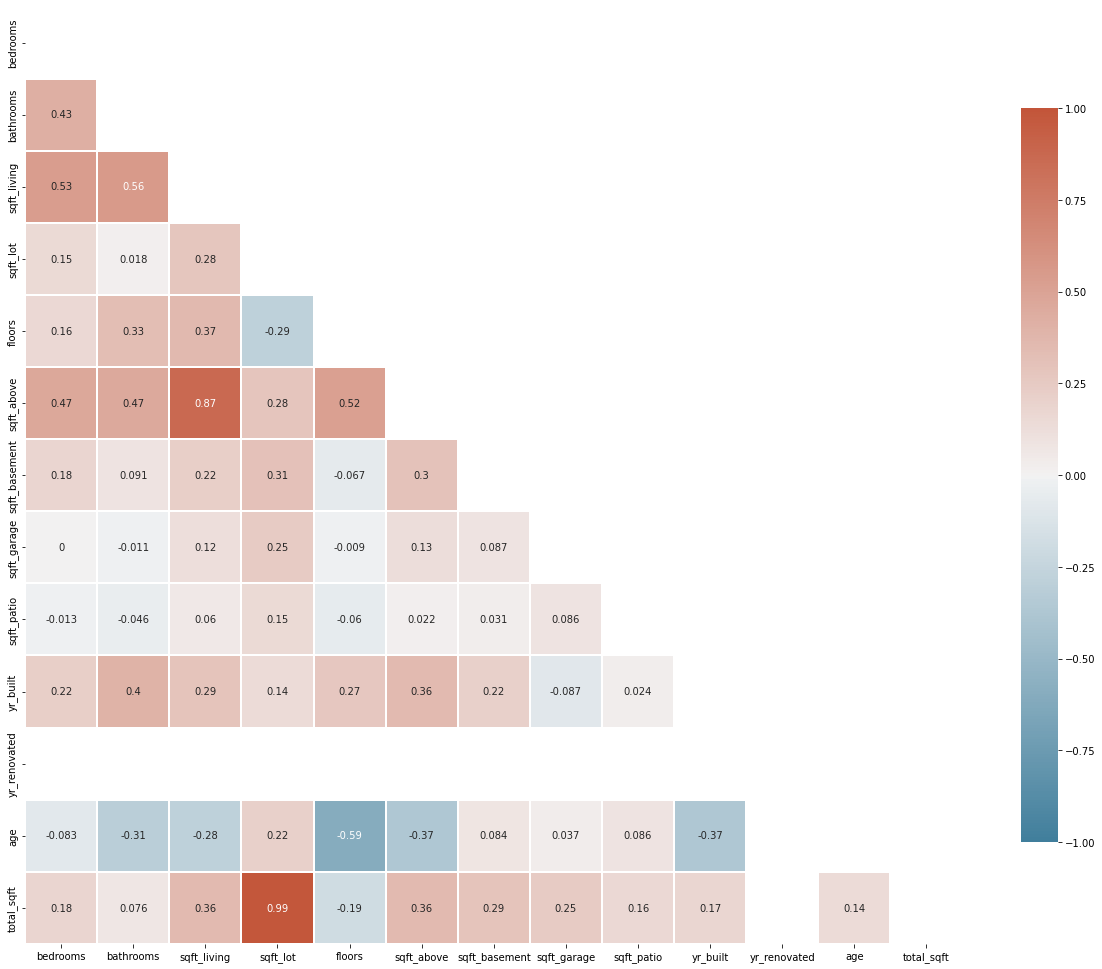

In [52]:
# check for multicolinearity with seaborn heatmap
# compute the correlation matrix
corr = round(data_pred.corr(), 3)

# generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# set up the matplotlib figure
fig, ax = plt.subplots(figsize=(21, 18))

# generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0, square=True, linewidths=1, cbar_kws={"shrink": .75}, annot=True)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/images/multicolin_heatmap.png')

- Using .75 as a cutoff, there is high correlation between sqft_living and sqft_above as a result will probably only retain one of these.

##### 4.4.1 Visually verifying check for multicollinearity

In [53]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking
corr_pred = data_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
corr_pred['pairs'] = list(zip(corr_pred.level_0, corr_pred.level_1))

# set index to pairs
corr_pred.set_index(['pairs'], inplace=True)

#drop level columns
corr_pred.drop(columns=['level_0', 'level_1'], inplace=True)

# rename correlation column as cc rather than 0
corr_pred.columns = ['cc']

# drop duplicates
corr_pred.drop_duplicates(inplace=True)

In [54]:
# show correlation >.75 and below 1
corr_pred[(corr_pred.cc>.75) & (corr_pred.cc<1)]

cc
pairs                              
(sqft_lot, total_sqft)     0.988613
(sqft_living, sqft_above)  0.873090

Based on the multicollinearity checks, I have decided to work with `total_sqft` and `sqft_living` in lieu of `sqft_lot` and `sqft_above` respectively.

### 4.5 Dealing with categorical variables

In [55]:
# converting categorical variables to category type
cat_vars = ['bedrooms','bathrooms','floors','waterfront','greenbelt', 'nuisance', 'view','condition','grade','heat_source', 'sewer_system','zipcode']

for column in data[cat_vars]:
    data_trans[cat_vars ] = data_trans[cat_vars ].astype('category') 

#### 4.5.1 Review relationship between Price and the categorical variables to guide the decision on which to include in the model.

In [56]:
#define a function to plot outputs
def plot_cat_vars(cat, var_dat):
  var = str(cat)
  var_dat = pd.concat([data['price'] / 100_000, data[var]], axis=1)
  fig, ax = plt.subplots(figsize=(8,4))
  fig = sns.boxplot(x=var, y='price', data=var_dat)
  plt.title(var.title() + ' and Price', fontsize=15, fontname='silom')
  plt.xticks(rotation=45)
  plt.savefig('/content/drive/MyDrive/Colab Notebooks/images/'+var+'_vs_price.png')

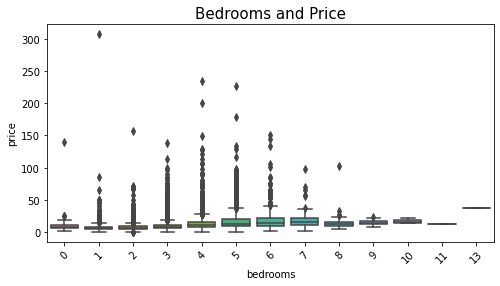

In [57]:
plot_cat_vars('bedrooms','bed_vs_price')



```
# Number of bedrooms seem to have a direct correlation to price, once it hits 6, it seems to taper off.
```



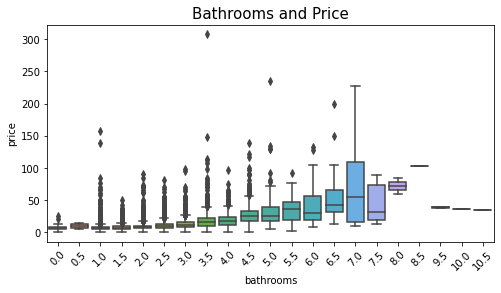

In [58]:
plot_cat_vars('bathrooms','bath_vs_price')



```
# Number of bathrooms seem to have a direct correlation to price as well, steadily climbs as number goes up.
```



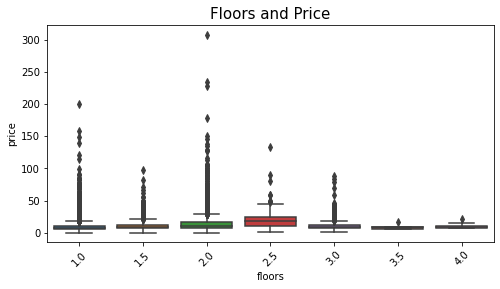

In [59]:
plot_cat_vars('floors','floor_vs_price')



```
# Price stability right around and after 2.5 floors which could mean 1st, 2nd floor and basement
```



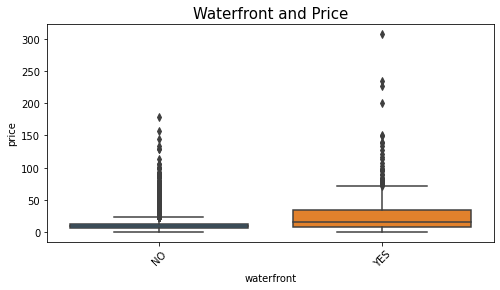

In [60]:
plot_cat_vars('waterfront','waterfront_vs_price')



```
# Waterfront house expetedly have a higher mean price
```



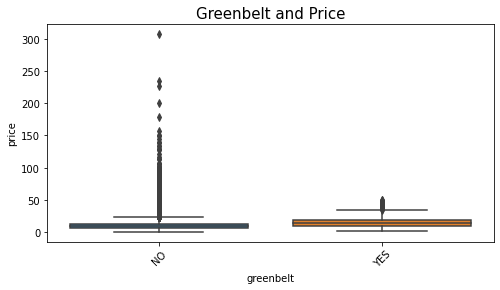

In [61]:
plot_cat_vars('greenbelt','greenbelt_vs_price')



```
# Although not a lot of houses are adjascent to a greenbelt, those that are have slightly higher mean price
```



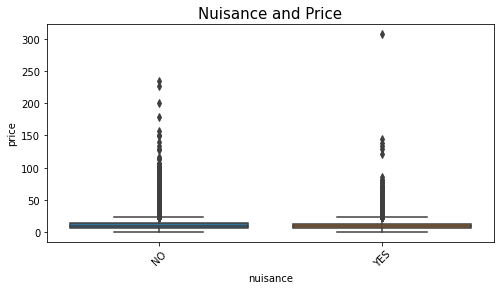

In [62]:
plot_cat_vars('nuisance','nuisance_vs_price')



```
# No nuisance indicates higher price
```



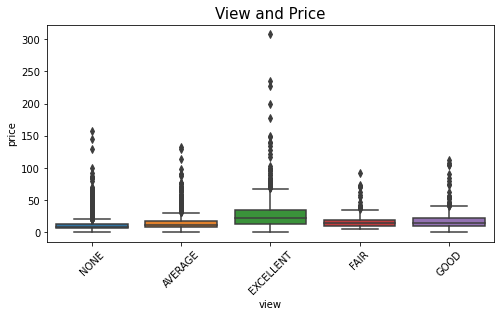

In [63]:
plot_cat_vars('view','view_vs_price')



```
# Although excellent view indicates higher price, however there are still some higher priced homes with 0 view, 
further analysis might required to consider that column as part of the model.
```



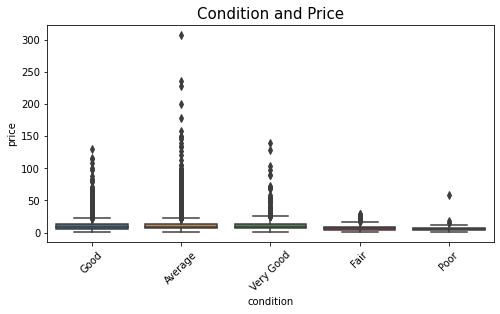

In [64]:
plot_cat_vars('condition','condition_vs_price')



```
# Average, Good and Very good condition have higher prices as expected
```



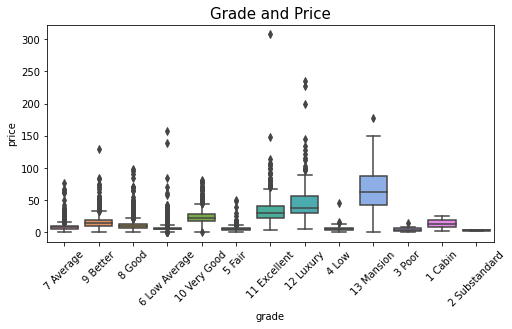

In [65]:
# grade vs price
plot_cat_vars('grade','condition_vs_price')



```
# As grades increases, mean price seems to increase as well
```



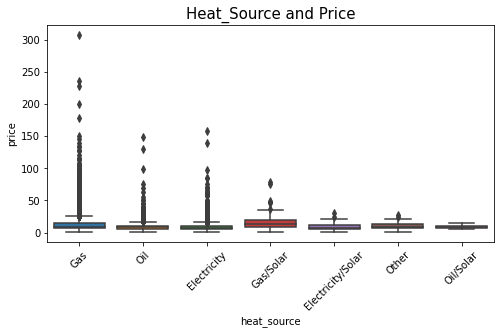

In [66]:
plot_cat_vars('heat_source','heat_source_vs_price')



```
# More houses have Gas as the heat source and also indicates higher prices, Gas/Solar combinationhowever has higher mean price
```



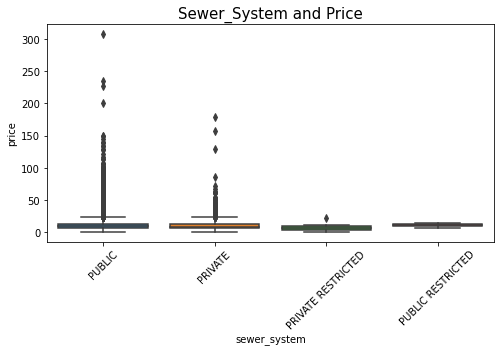

In [67]:
plot_cat_vars('sewer_system','sewer_system_vs_price')





```
# Public sewer system is dominant and comes with high prices.
```





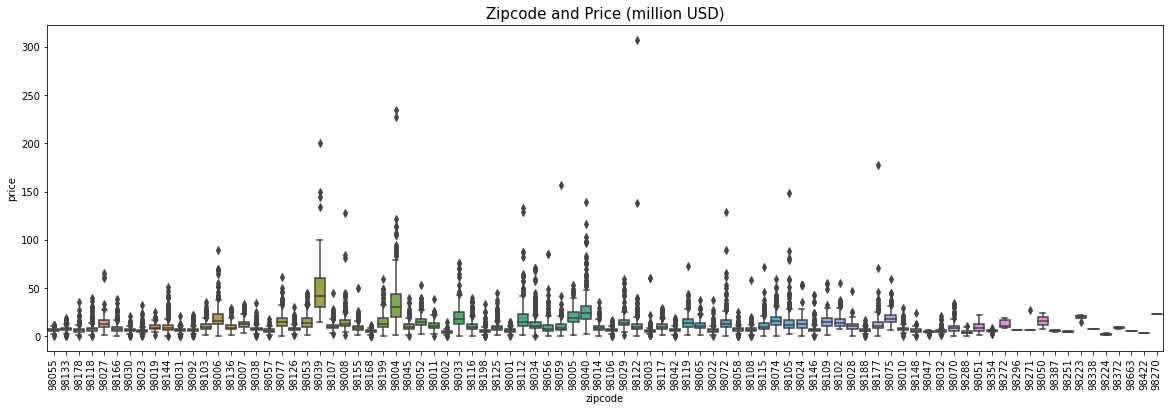

In [68]:
var_dat = pd.concat([data['price'] / 100_000, data['zipcode']], axis=1)
fig, ax = plt.subplots(figsize=(20,6))
fig = sns.boxplot(x='zipcode', y='price', data=var_dat)
plt.title('zipcode'.title() + ' and Price (million USD)', fontsize=15, fontname='silom')
plt.xticks(rotation=90)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/images/zipcode_vs_price.png')

## 4.6 One-Hot Encoding


In [69]:
# create dummy variable for categorical features
#cat_list_2 = ['bedrooms', 'bathrooms', 'grade']
cat_list_2 = ['bedrooms','bathrooms','floors','waterfront','greenbelt', 'nuisance', 'view','condition','grade','heat_source', 'sewer_system','zipcode']
dummies = pd.get_dummies(data_trans[cat_list_2], prefix=cat_list_2, drop_first=True) #drop a column to avoid dummy variable trap

data_preprocessed = data_trans.drop(cat_list_2, axis=1)

data_preprocessed = pd.concat([data_preprocessed, dummies], axis=1)

data_preprocessed.head(2)

date      price  sqft_living  sqft_lot  sqft_above  sqft_basement  \
0 2022-05-24  13.422468     7.073270  8.873468    7.073270           1320   
1 2021-12-13  13.732129     7.926603  8.810310    7.358831           1320   

   sqft_garage  sqft_patio  yr_built  yr_renovated  \
0          689          40      1969          1998   
1          689         240      1950          1998   

                                             address        lat       long  \
0  2102 Southeast 21st Court, Renton, Washington ...  47.461975 -122.19052   
1  11231 Greenwood Avenue North, Seattle, Washing...  47.711525 -122.35591   

   age  total_sqft  bedrooms_2  bedrooms_3  bedrooms_4  bathrooms_1.0  \
0   53    9.026418           0           0           1              1   
1   48    9.156201           0           1           0              0   

   bathrooms_1.5  bathrooms_2.0  bathrooms_2.5  bathrooms_3.0  floors_1.5  \
0              0              0              0              0           0   
1              0              0              1              0           0   

   floors_2.0  floors_2.5  floors_3.0  floors_3.5  floors_4.0  waterfront_YES  \
0           0           0           0           0           0               0   
1           0           0           0           0           0               0   

   greenbelt_YES  nuisance_YES  view_EXCELLENT  view_FAIR  view_GOOD  \
0              0             0               0          0          0   
1              0             1               0          0          0   

   view_NONE  condition_Fair  condition_Good  condition_Poor  \
0          1               0               1               0   
1          0               0               0               0   

   condition_Very Good  grade_10 Very Good  grade_11 Excellent  \
0                    0                   0                   0   
1                    0                   0                   0   

   grade_12 Luxury  grade_13 Mansion  grade_2 Substandard  grade_3 Poor  \
0                0                 0                    0             0   
1                0                 0                    0             0   

   grade_4 Low  grade_5 Fair  grade_6 Low Average  grade_7 Average  \
0            0             0                    0                1   
1            0             0                    0                1   

   grade_8 Good  grade_9 Better  heat_source_Electricity/Solar  \
0             0               0                              0   
1             0               0                              0   

   heat_source_Gas  heat_source_Gas/Solar  heat_source_Oil  \
0                1                      0                0   
1                0                      0                1   

   heat_source_Oil/Solar  heat_source_Other  sewer_system_PRIVATE RESTRICTED  \
0                      0                  0                                0   
1                      0                  0                                0   

   sewer_system_PUBLIC  sewer_system_PUBLIC RESTRICTED  zipcode_98002  \
0                    1                               0              0   
1                    1                               0              0   

   zipcode_98003  zipcode_98004  zipcode_98005  zipcode_98006  zipcode_98007  \
0              0              0              0              0              0   
1              0              0              0              0              0   

   zipcode_98008  zipcode_98010  zipcode_98011  zipcode_98014  zipcode_98019  \
0              0              0              0              0              0   
1              0              0              0              0              0   

   zipcode_98022  zipcode_98023  zipcode_98024  zipcode_98027  zipcode_98028  \
0              0              0              0              0              0   
1              0              0              0              0              0   

   zipcode_98029  zipcode_98030  zipcode_98031  zipcode_98032  zip

In [99]:
# corr = data_preprocessed.corr().abs()
# fig, ax=plt.subplots(figsize=(75,30))
# fig.suptitle('Variable Correlations for the Preprocessed Data', fontsize=30, y=.95, fontname='Silom')
# heatmap = sns.heatmap(corr, cmap='Reds', annot=True)
# plt.savefig('/content/drive/MyDrive/Colab Notebooks/images/data_prep_corr.png')

Checking multicolinarity after Hot Encoding

In [100]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking
corr_pred = data_preprocessed.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
corr_pred['pairs'] = list(zip(corr_pred.level_0, corr_pred.level_1))

# set index to pairs
corr_pred.set_index(['pairs'], inplace=True)

#drop level columns
corr_pred.drop(columns=['level_0', 'level_1'], inplace=True)

# rename correlation column as cc rather than 0
corr_pred.columns = ['cc']

# drop duplicates
corr_pred.drop_duplicates(inplace=True)

In [101]:
# show correlation >.75 and below 1
corr_pred[(corr_pred.cc>.75) & (corr_pred.cc<1)]

cc
pairs                              
(sqft_lot, total_sqft)     0.988613
(sqft_living, sqft_above)  0.873090
(bedrooms_4, bedrooms_3)   0.752238

## 4.7 Continous Variables Preparation

### 4.7.0  Visualizing the relationship of Price and ALL variables following One Hot Encoding using Joint Plots
- Jointplot comprises three plots - one plot displays a bivariate graph which shows how `Price` varies with the `predictor (X)`. Another plot is placed horizontally at the top of the bivariate graph and it shows the distribution of the `predictor(X)`. The third plot is placed on the right margin of the bivariate graph with the orientation set to vertical and it shows the distribution of `Price`.
- I also include a regression line or “line of best fit” gives a visual presentation of the relationship of `Price` with individual predictor. The line is drawn such that it lies close to all the data points as much as possible.

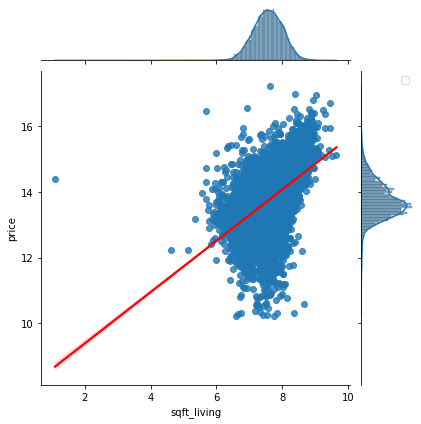

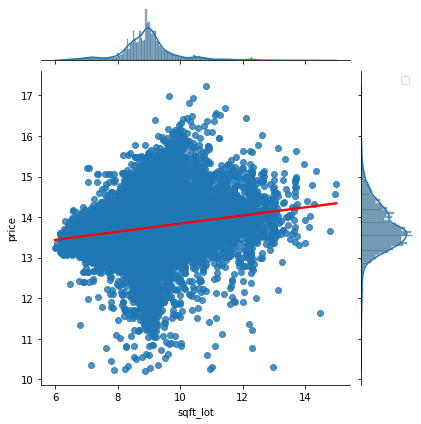

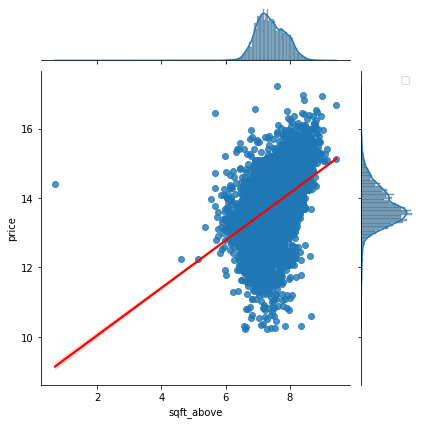

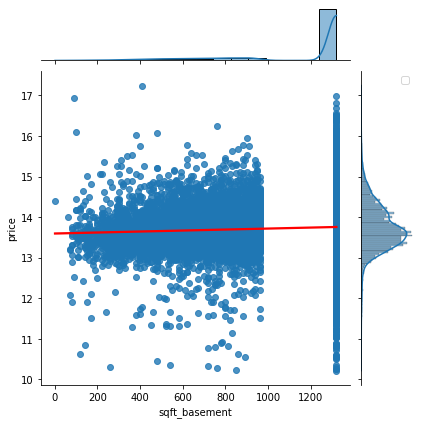

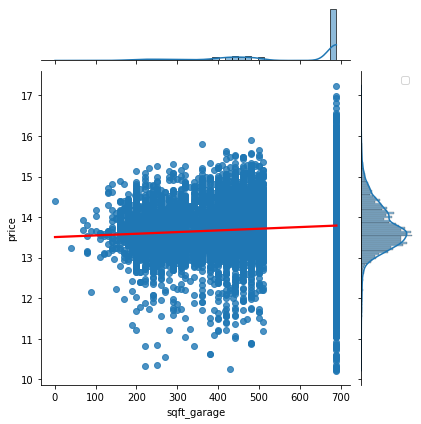

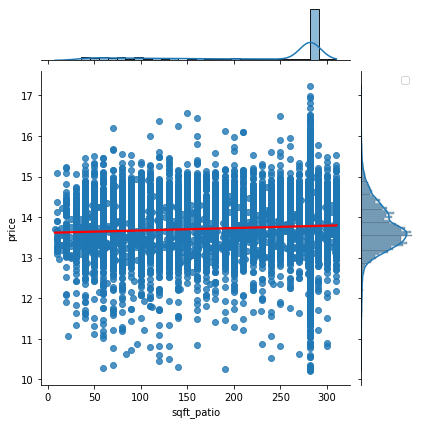

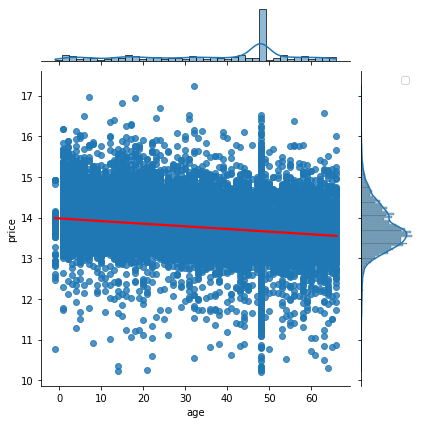

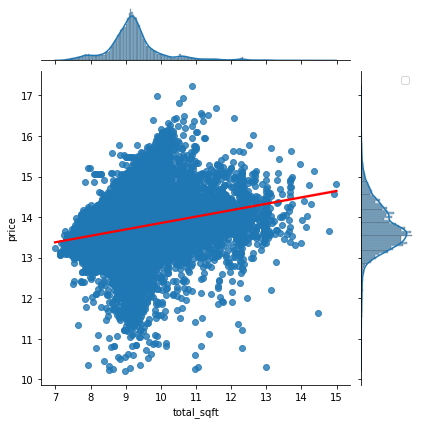

In [73]:
continuous = ['sqft_living','sqft_lot','sqft_above','sqft_basement', 'sqft_garage','sqft_patio', 'age','total_sqft']

for column in continuous:
    sns.jointplot(x=column, y="price", data=data_trans, kind='reg', label=column,joint_kws={'line_kws':{'color':'red'}})
    plt.legend()
    plt.show()

##4.8 Dummy Variables Prep

In [74]:
print(data_preprocessed.columns.tolist())

['date', 'price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built', 'yr_renovated', 'address', 'lat', 'long', 'age', 'total_sqft', 'bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bathrooms_1.0', 'bathrooms_1.5', 'bathrooms_2.0', 'bathrooms_2.5', 'bathrooms_3.0', 'floors_1.5', 'floors_2.0', 'floors_2.5', 'floors_3.0', 'floors_3.5', 'floors_4.0', 'waterfront_YES', 'greenbelt_YES', 'nuisance_YES', 'view_EXCELLENT', 'view_FAIR', 'view_GOOD', 'view_NONE', 'condition_Fair', 'condition_Good', 'condition_Poor', 'condition_Very Good', 'grade_10 Very Good', 'grade_11 Excellent', 'grade_12 Luxury', 'grade_13 Mansion', 'grade_2 Substandard', 'grade_3 Poor', 'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average', 'grade_7 Average', 'grade_8 Good', 'grade_9 Better', 'heat_source_Electricity/Solar', 'heat_source_Gas', 'heat_source_Gas/Solar', 'heat_source_Oil', 'heat_source_Oil/Solar', 'heat_source_Other', 'sewer_system_PRIVATE RESTRICTED', 'sewer_system_PUBL

In [75]:
#Rename variables with slash
data_preprocessed.rename(columns = {'heat_source_Gas/Solar':'heat_source_Gas_Solar', 'heat_source_Oil/Solar':'heat_source_Oil_Solar','heat_source_Electricity/Solar':'heat_source_Electricity_Solar'}, inplace = True)

In [76]:
print(data_preprocessed.columns.tolist())

['date', 'price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built', 'yr_renovated', 'address', 'lat', 'long', 'age', 'total_sqft', 'bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bathrooms_1.0', 'bathrooms_1.5', 'bathrooms_2.0', 'bathrooms_2.5', 'bathrooms_3.0', 'floors_1.5', 'floors_2.0', 'floors_2.5', 'floors_3.0', 'floors_3.5', 'floors_4.0', 'waterfront_YES', 'greenbelt_YES', 'nuisance_YES', 'view_EXCELLENT', 'view_FAIR', 'view_GOOD', 'view_NONE', 'condition_Fair', 'condition_Good', 'condition_Poor', 'condition_Very Good', 'grade_10 Very Good', 'grade_11 Excellent', 'grade_12 Luxury', 'grade_13 Mansion', 'grade_2 Substandard', 'grade_3 Poor', 'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average', 'grade_7 Average', 'grade_8 Good', 'grade_9 Better', 'heat_source_Electricity_Solar', 'heat_source_Gas', 'heat_source_Gas_Solar', 'heat_source_Oil', 'heat_source_Oil_Solar', 'heat_source_Other', 'sewer_system_PRIVATE RESTRICTED', 'sewer_system_PUBL

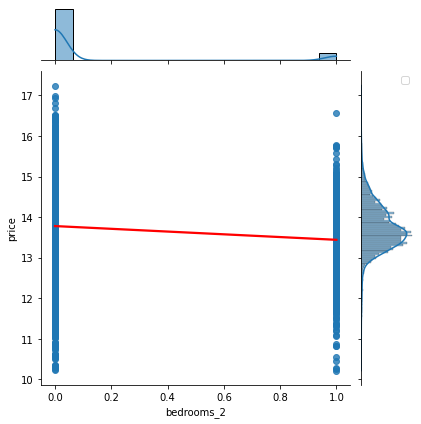

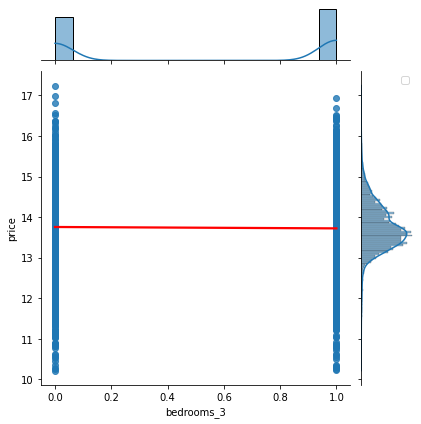

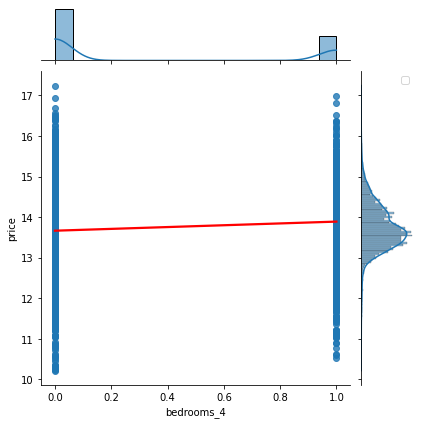

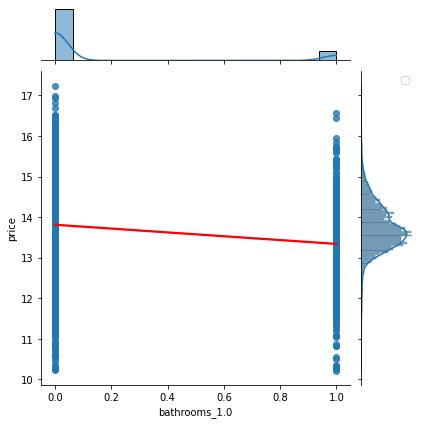

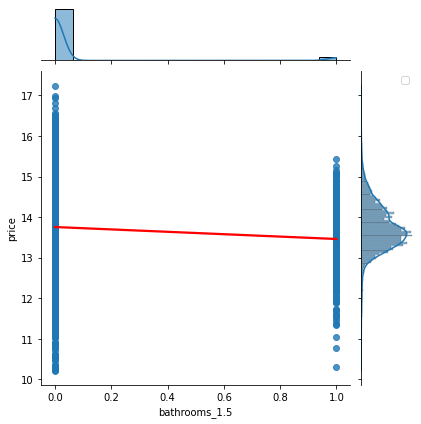

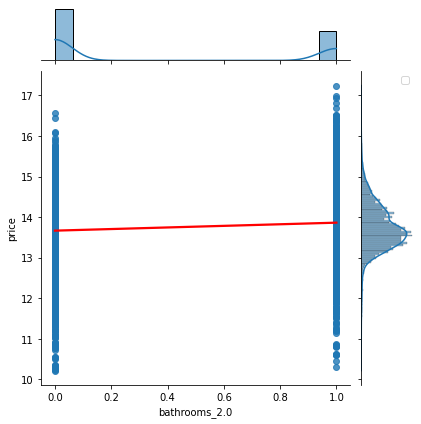

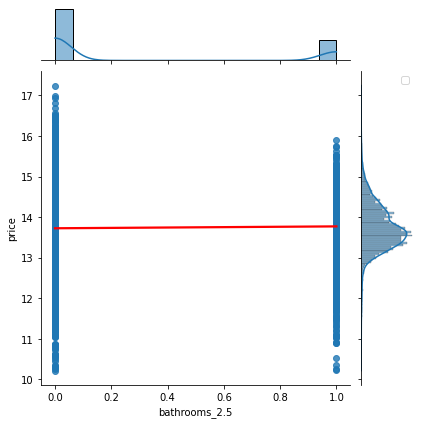

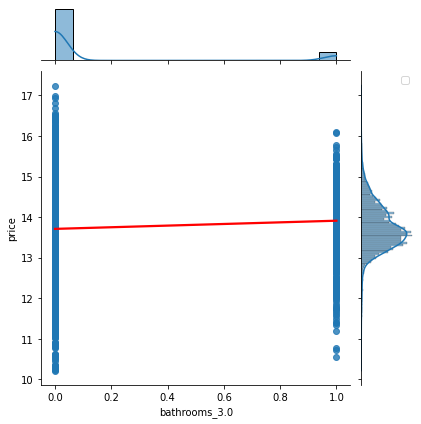

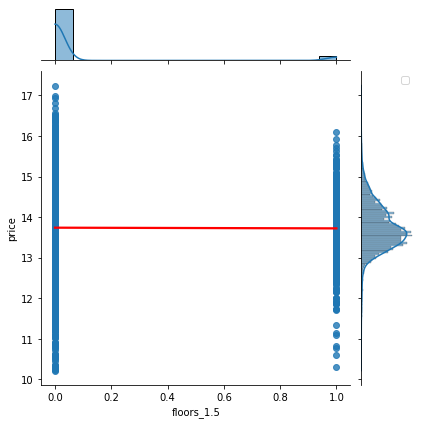

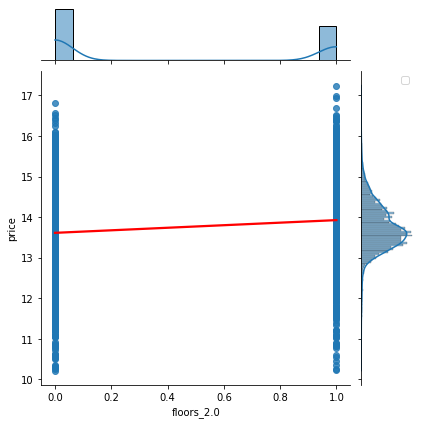

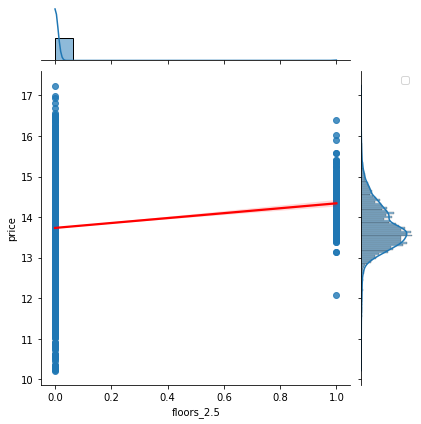

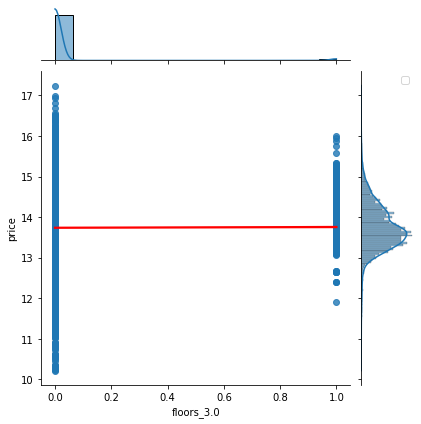

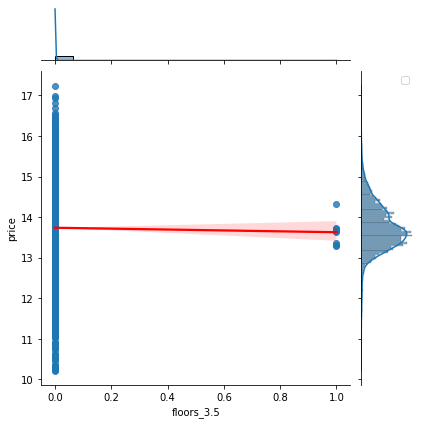

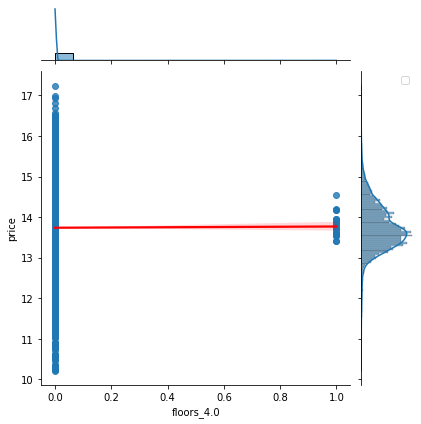

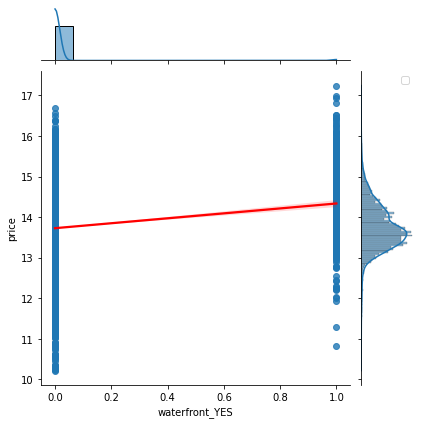

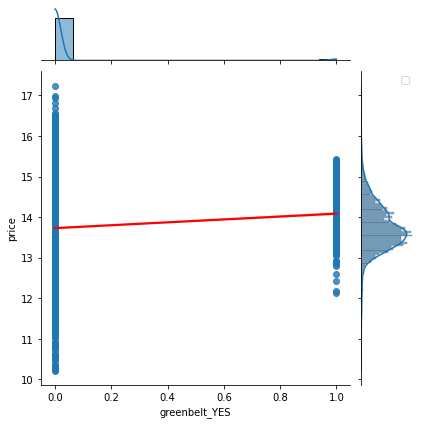

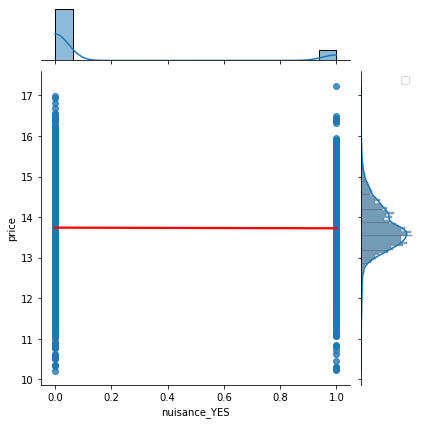

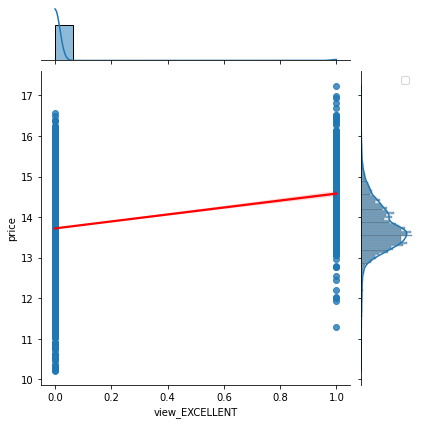

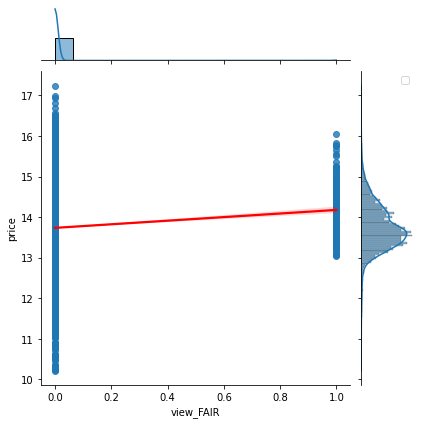

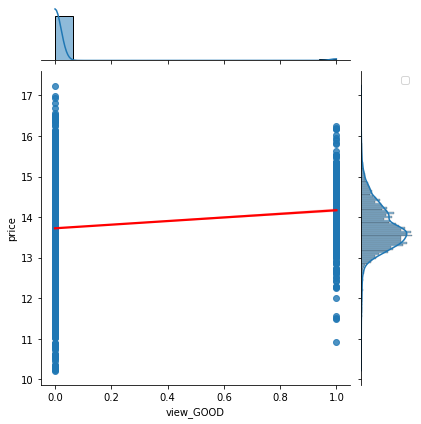

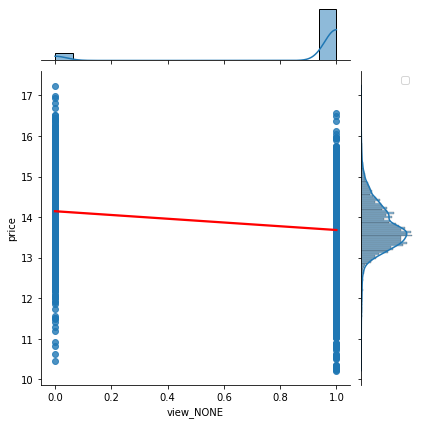

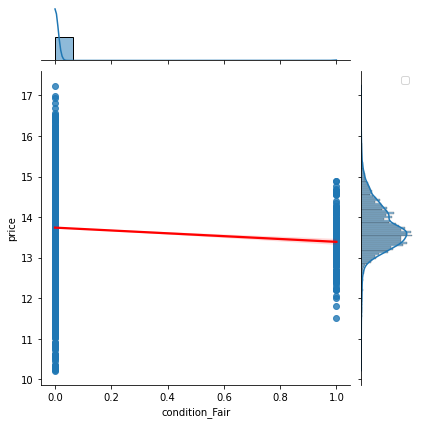

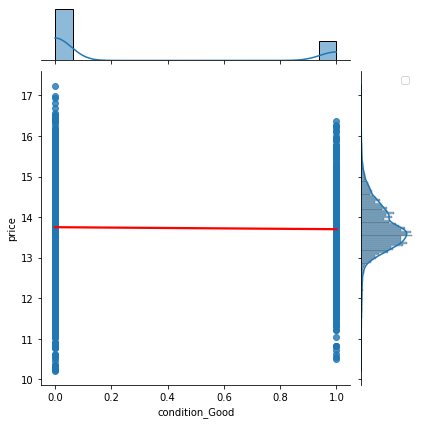

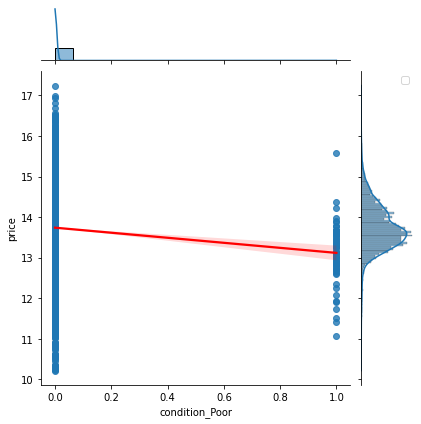

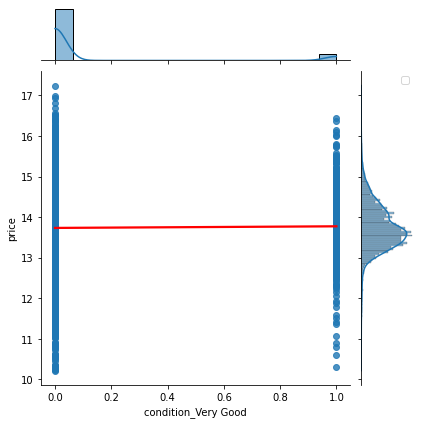

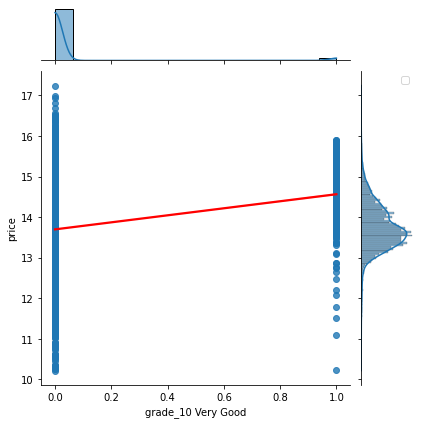

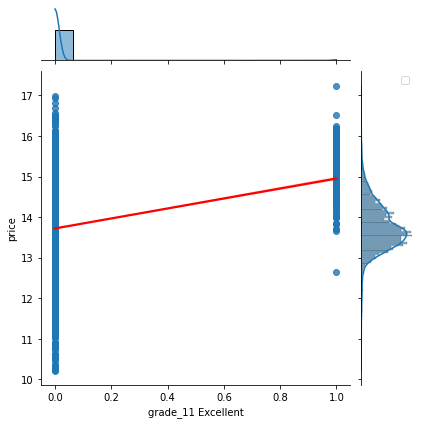

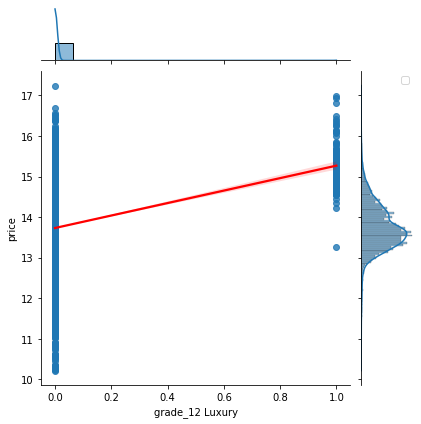

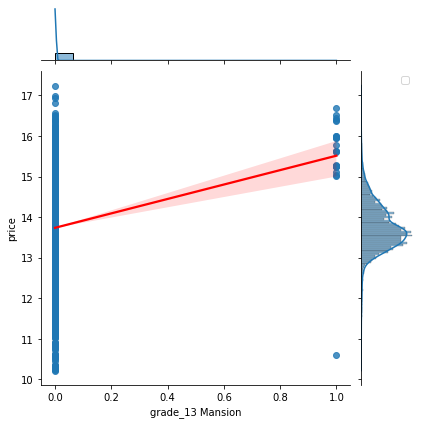

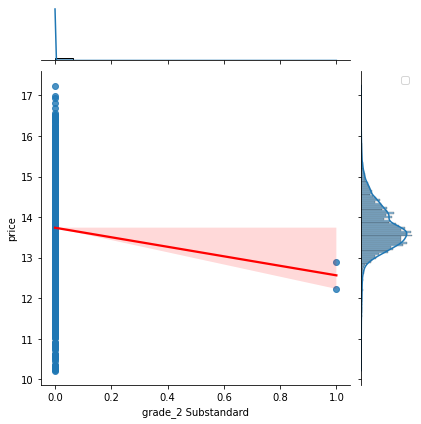

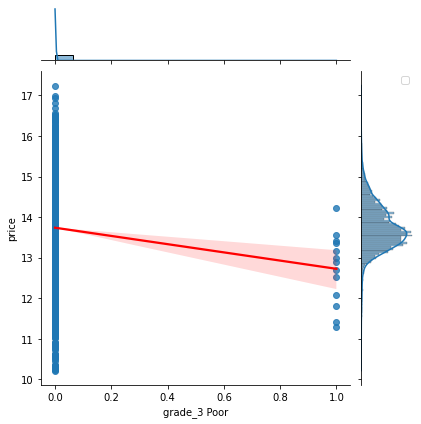

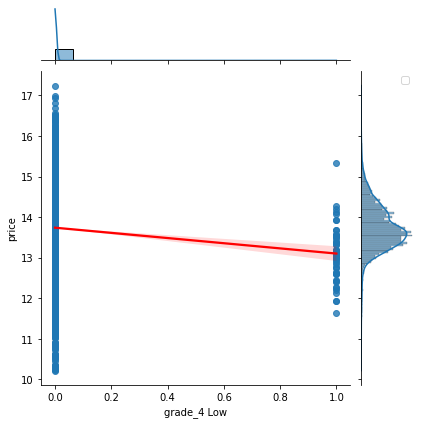

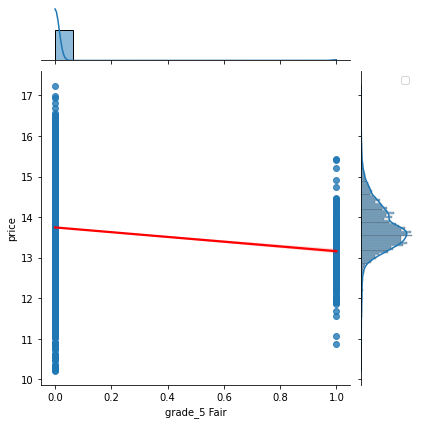

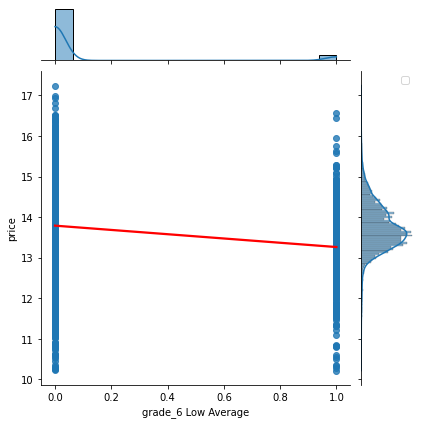

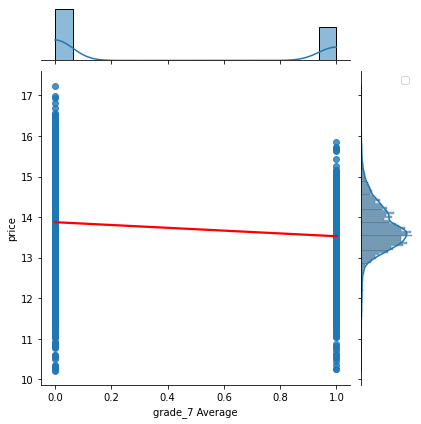

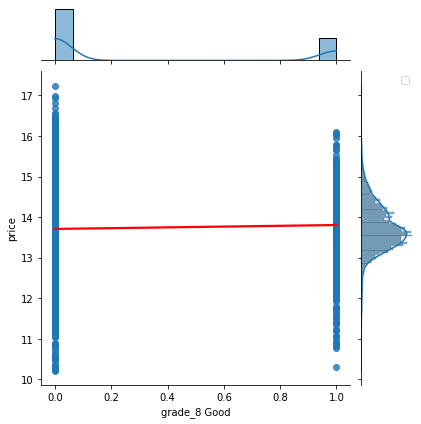

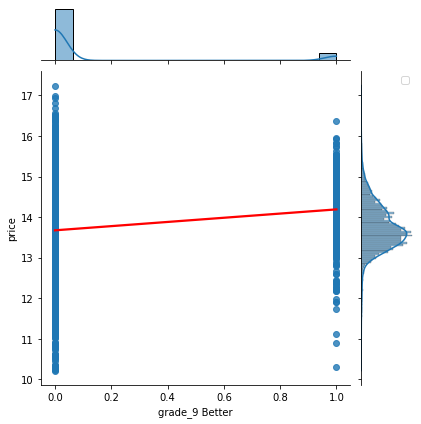

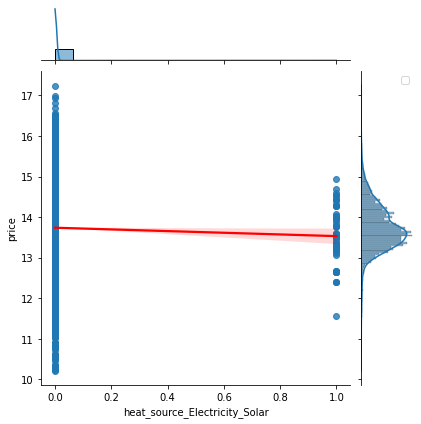

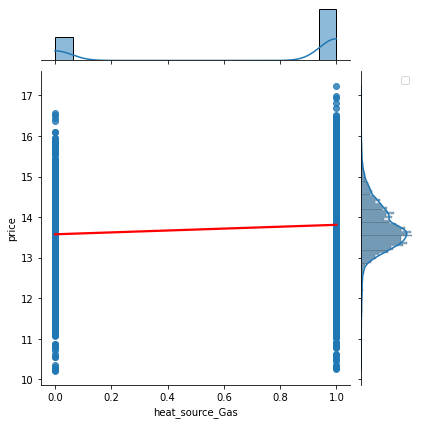

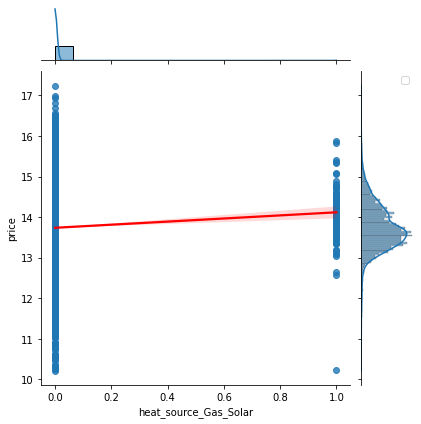

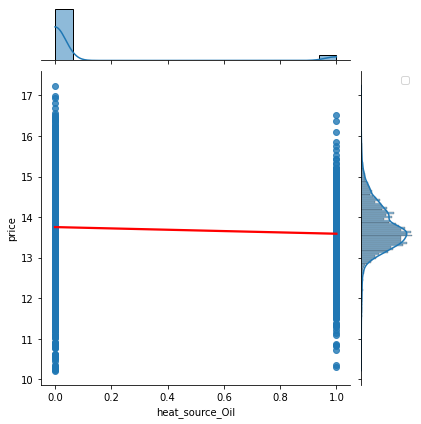

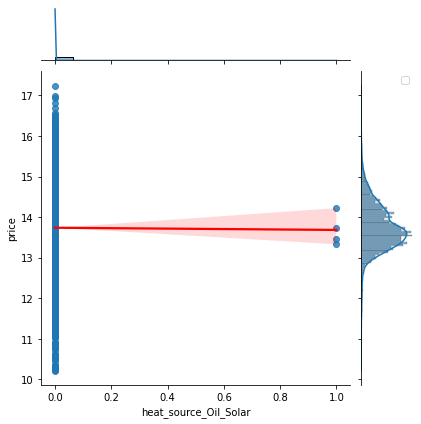

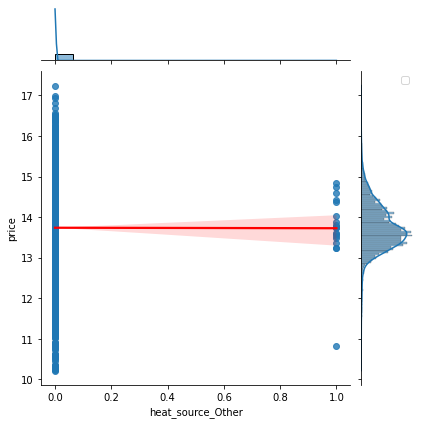

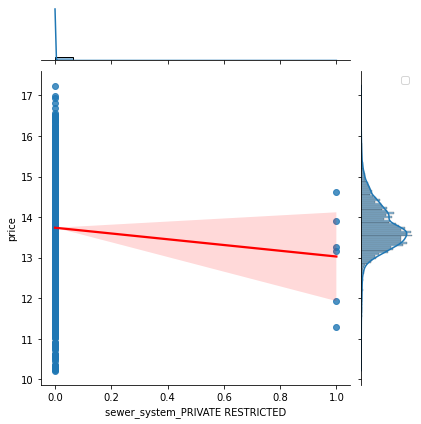

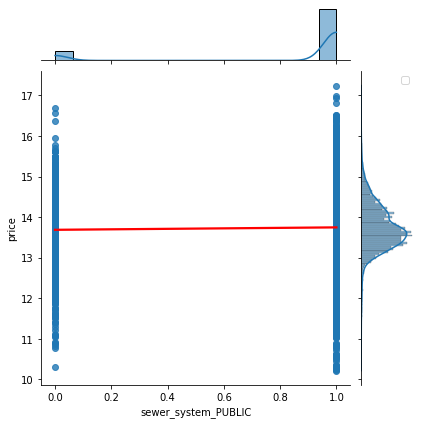

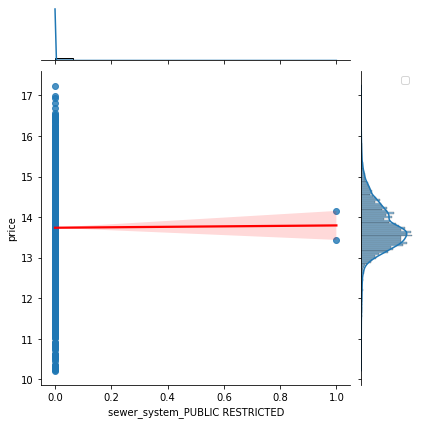

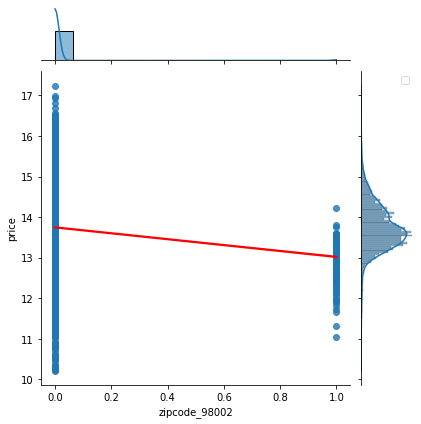

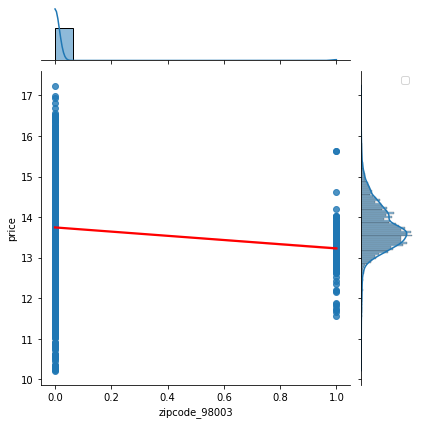

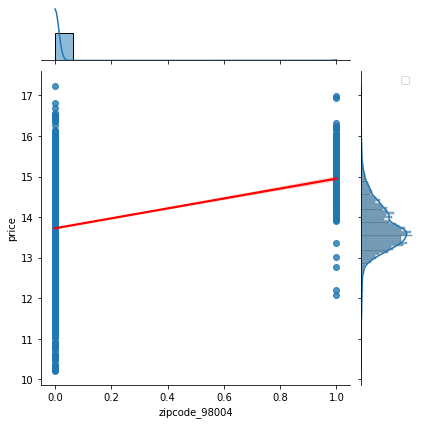

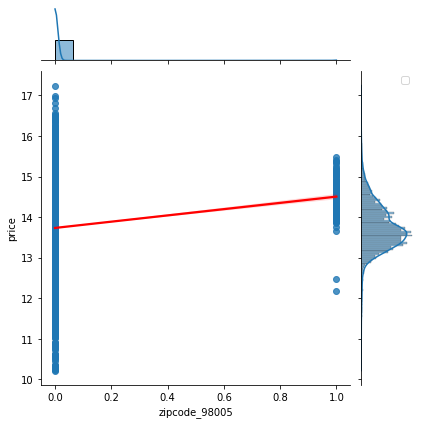

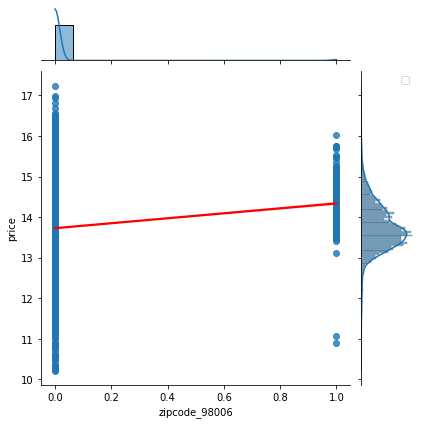

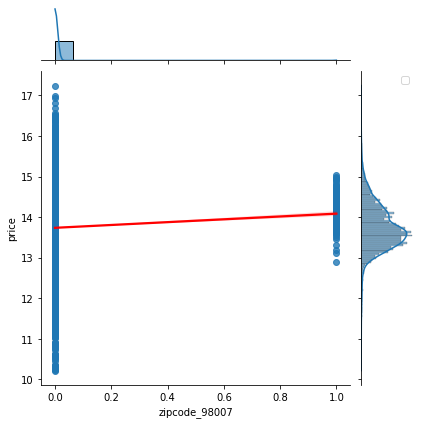

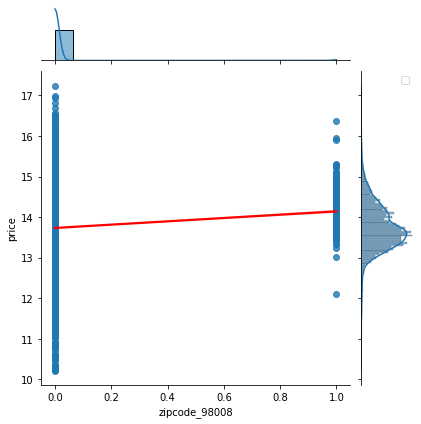

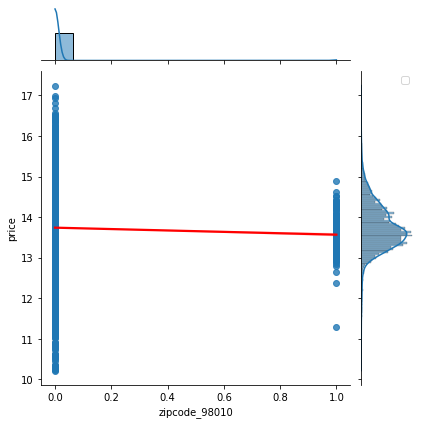

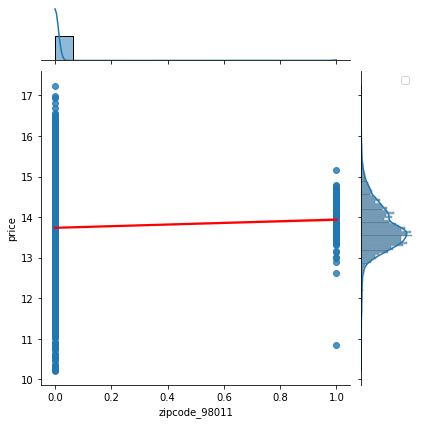

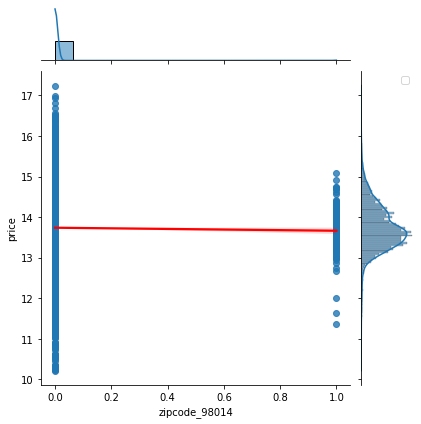

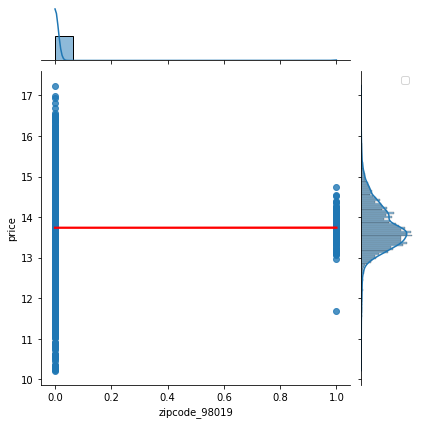

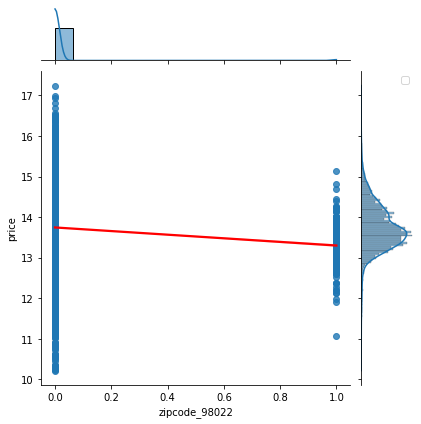

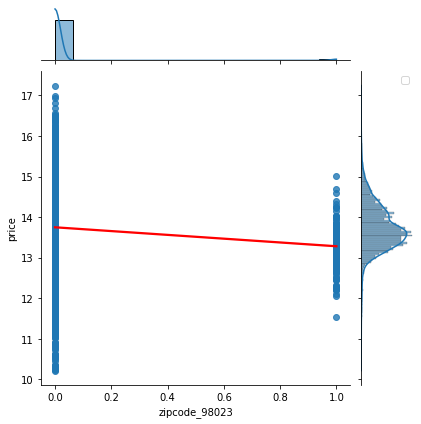

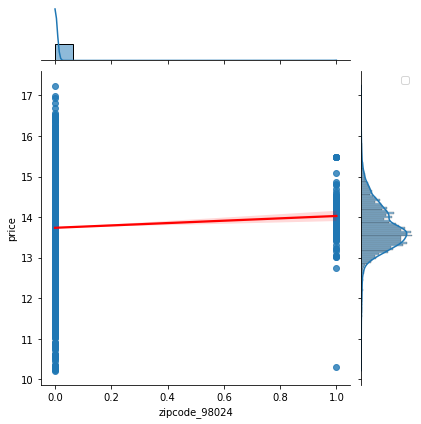

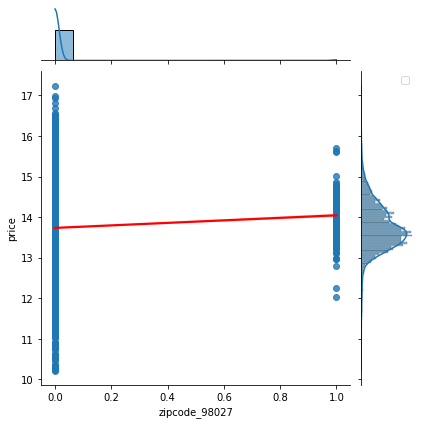

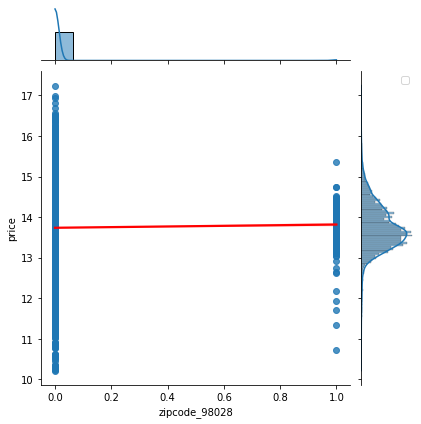

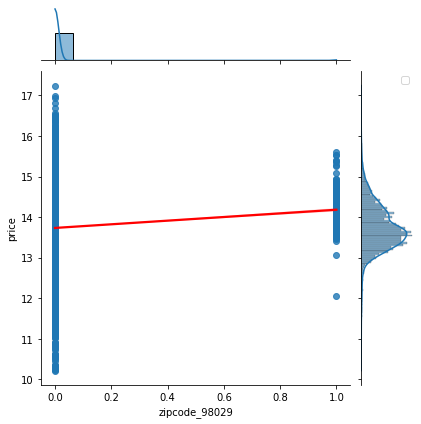

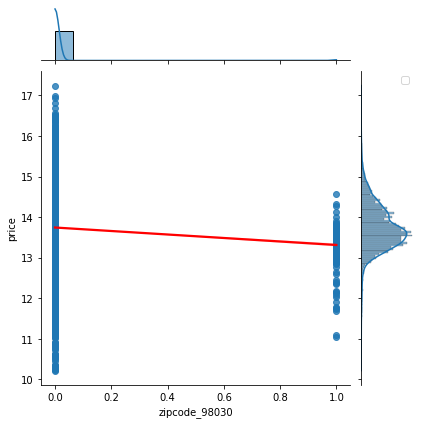

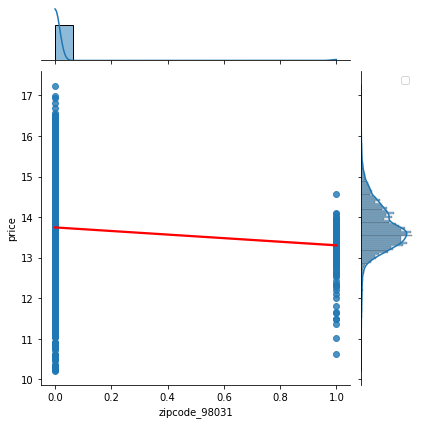

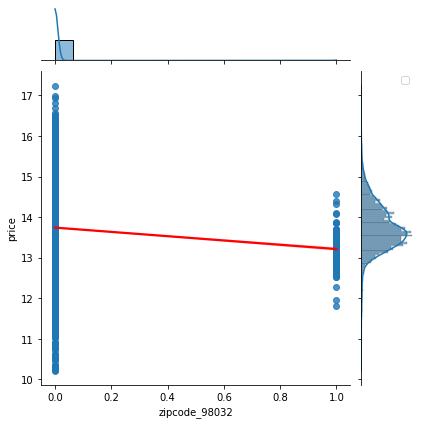

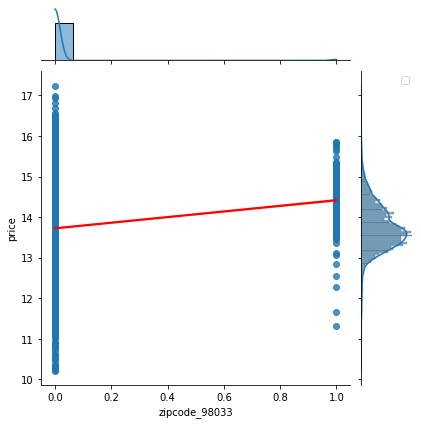

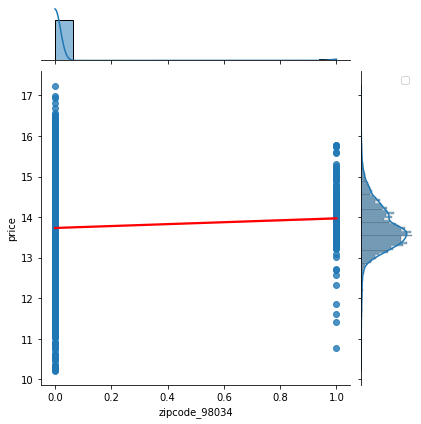

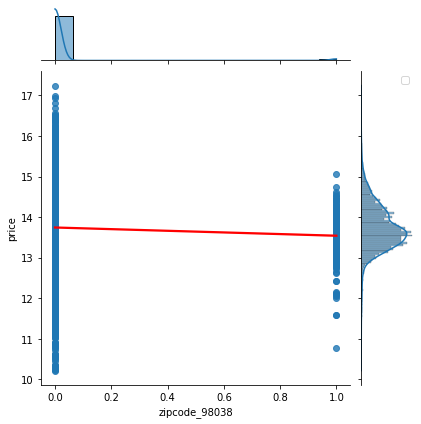

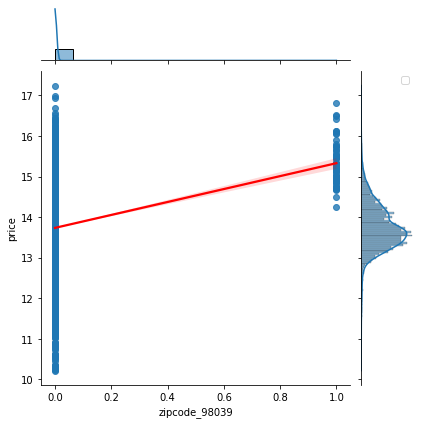

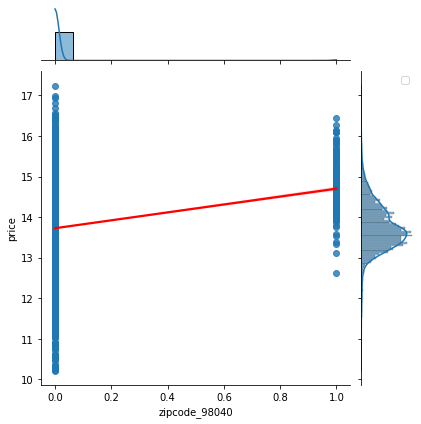

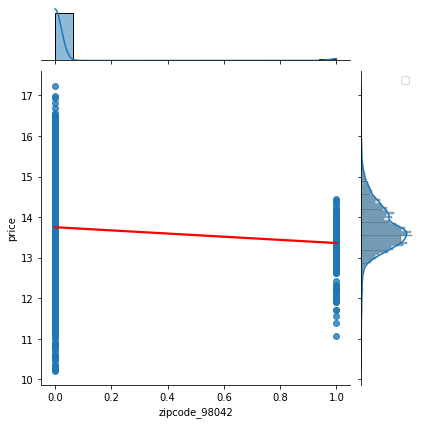

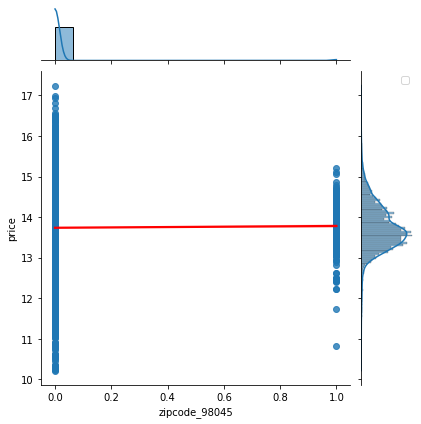

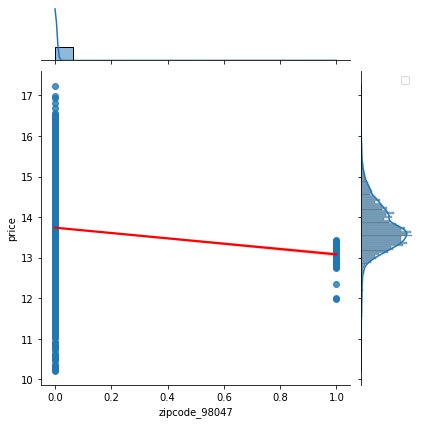

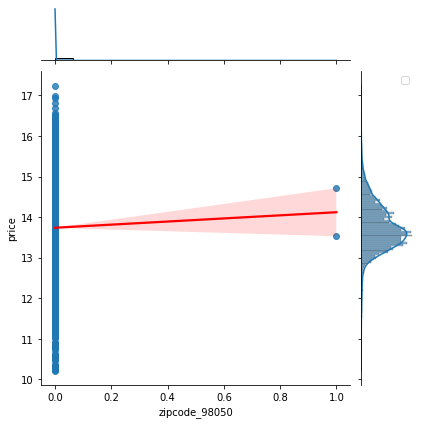

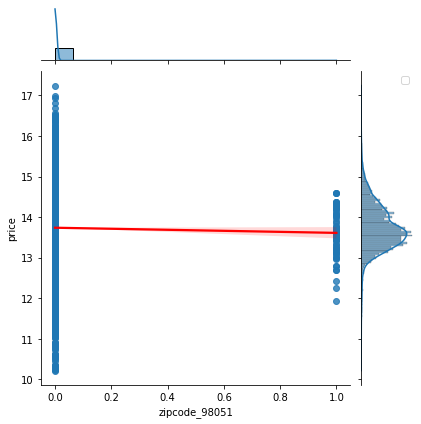

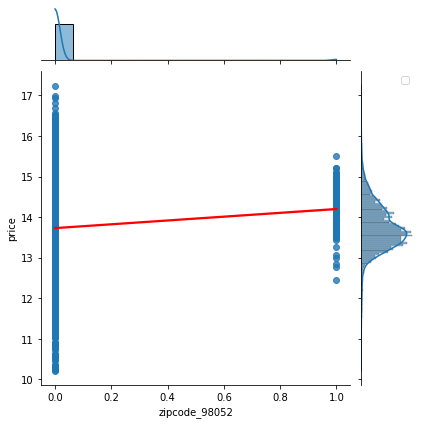

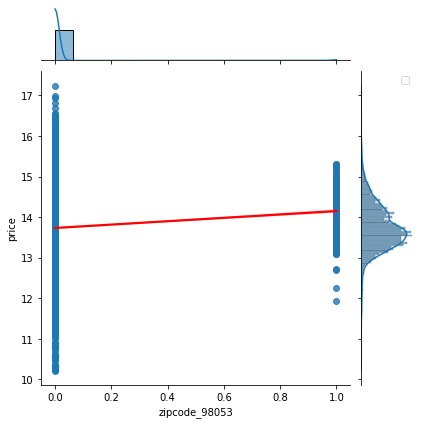

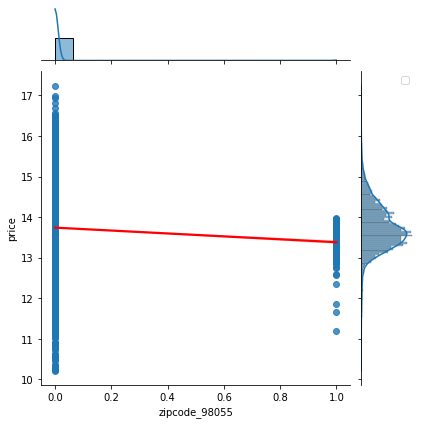

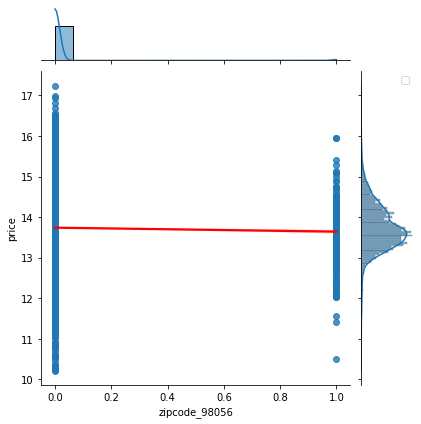

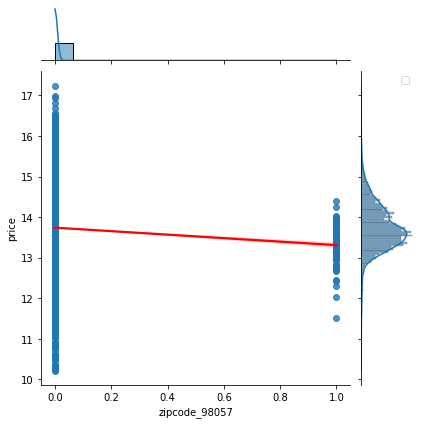

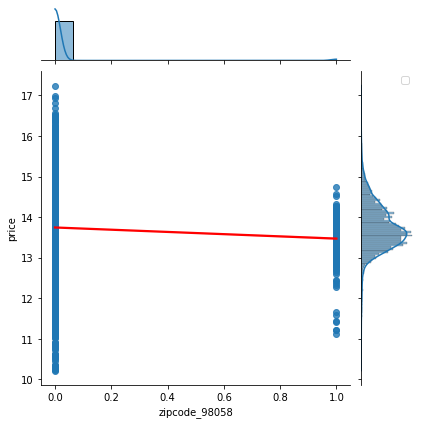

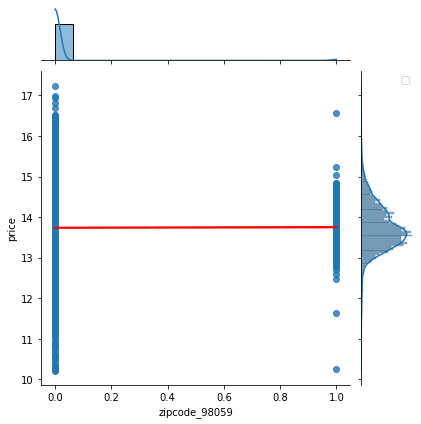

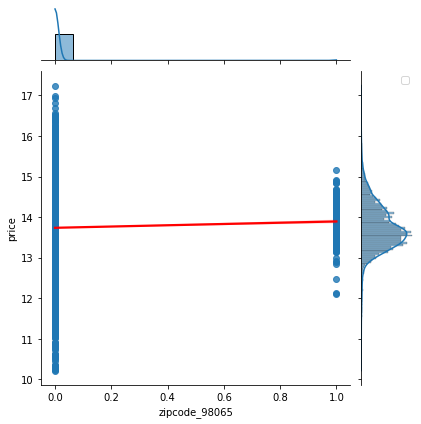

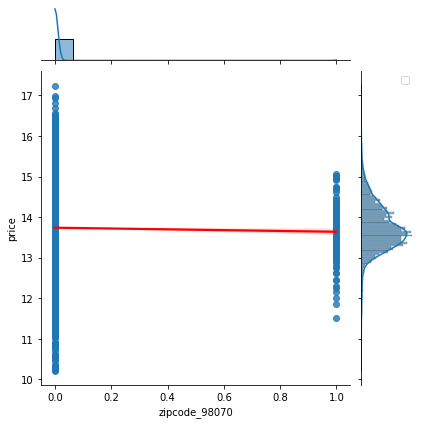

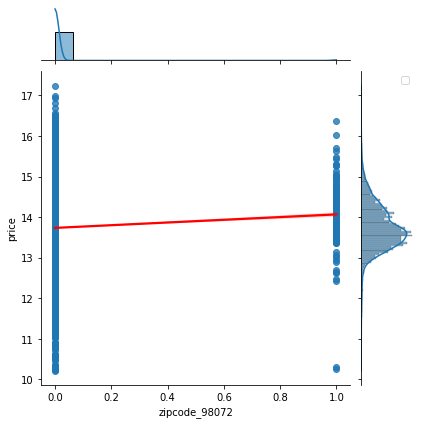

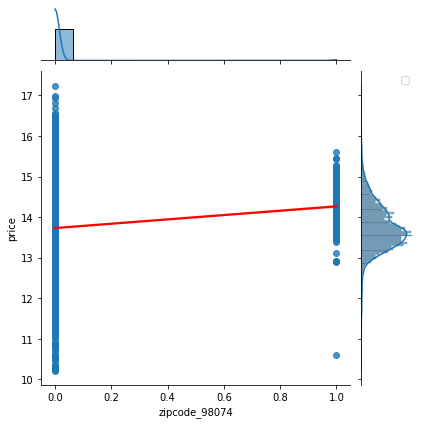

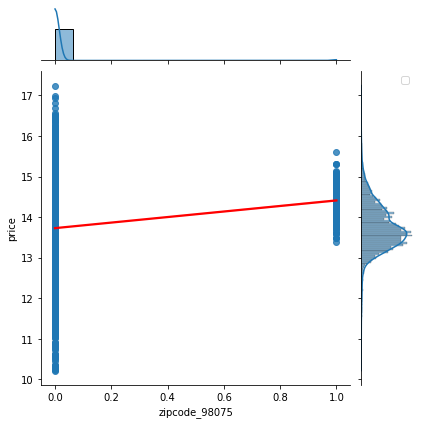

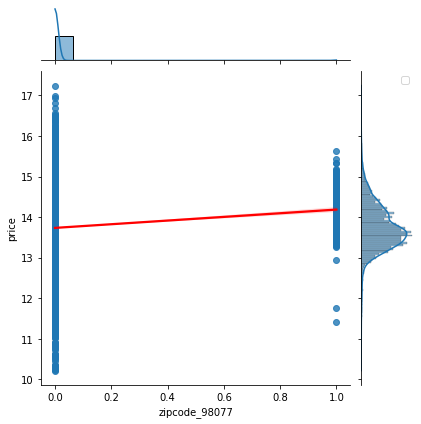

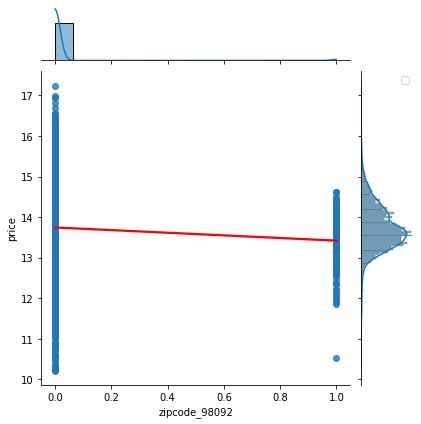

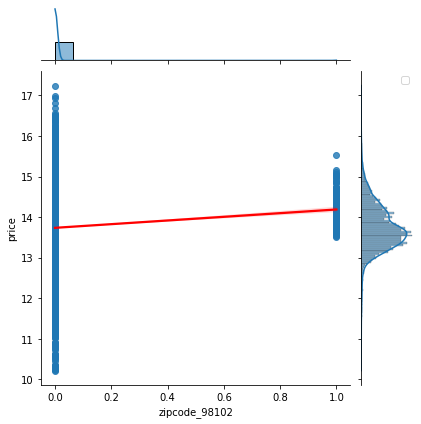

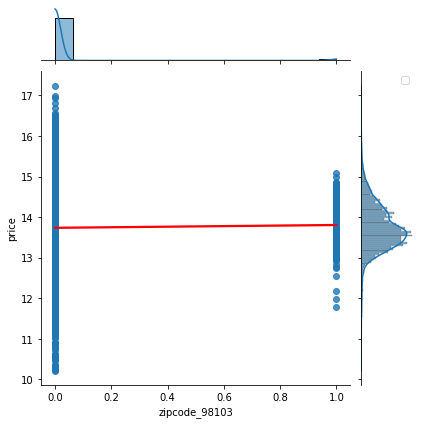

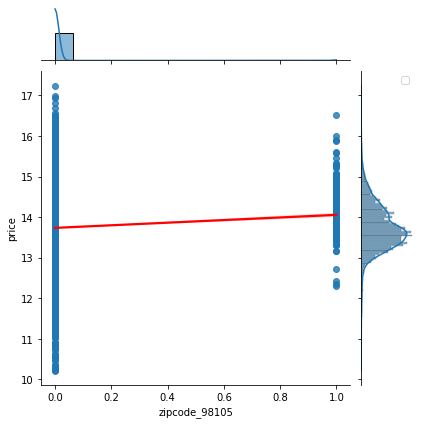

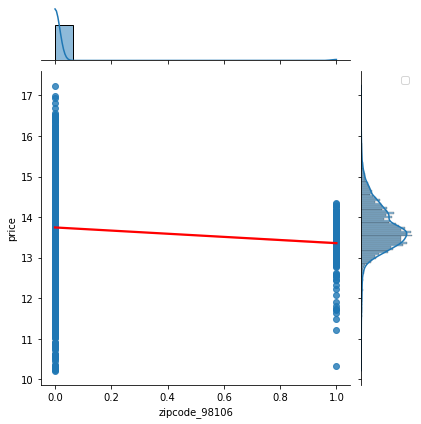

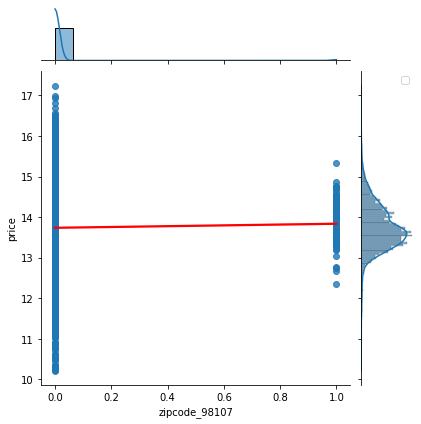

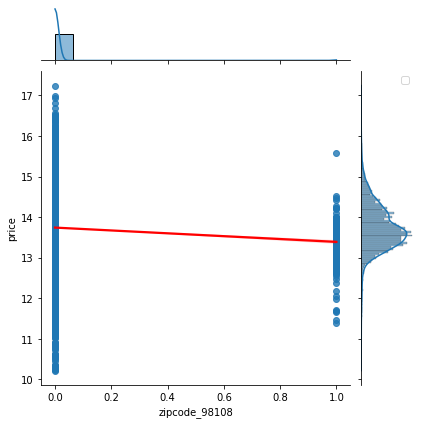

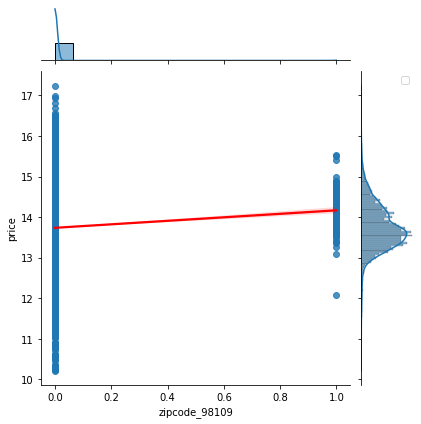

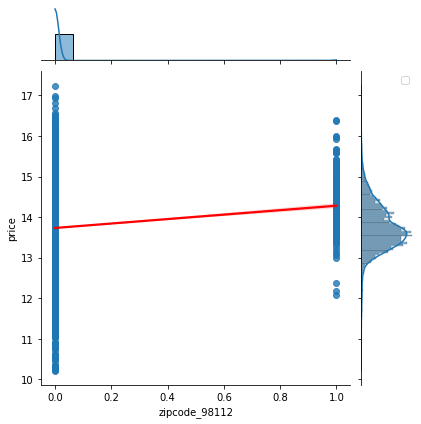

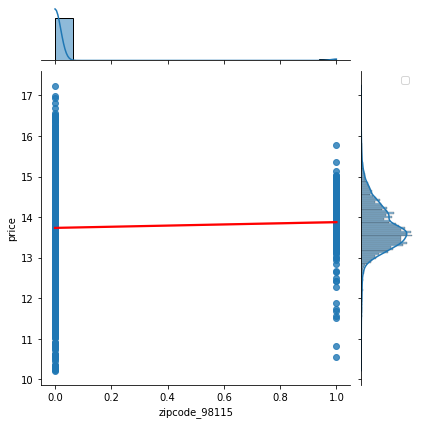

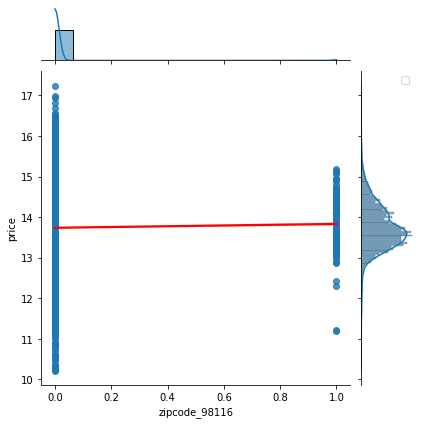

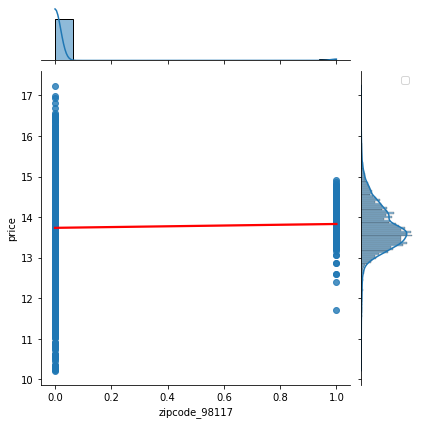

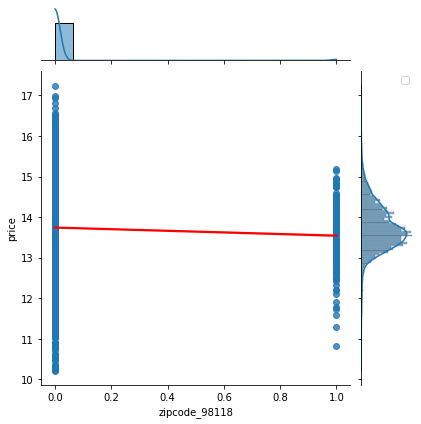

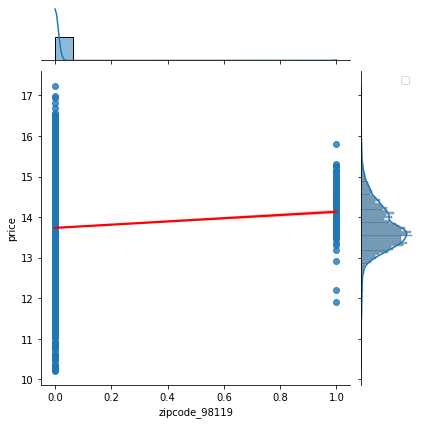

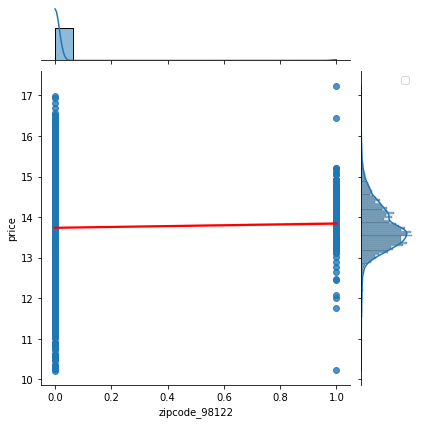

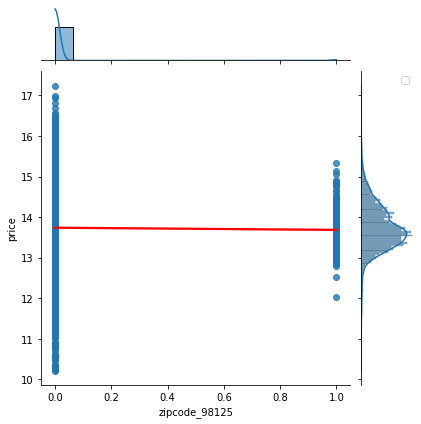

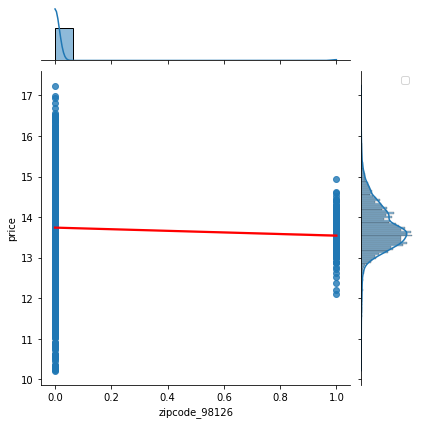

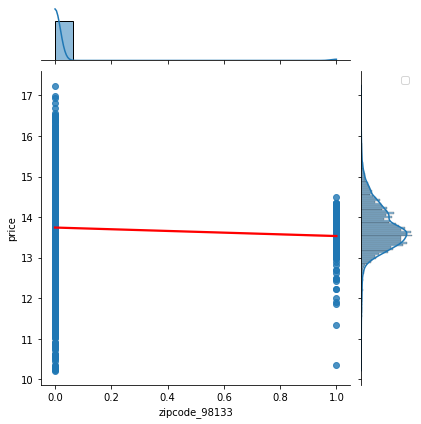

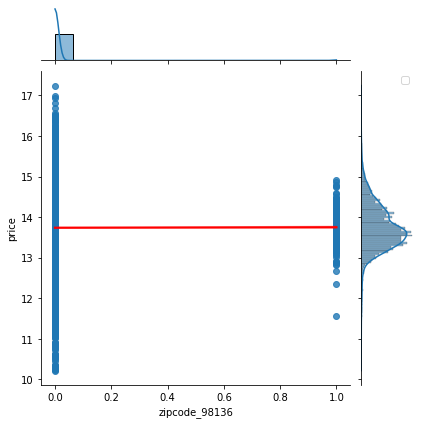

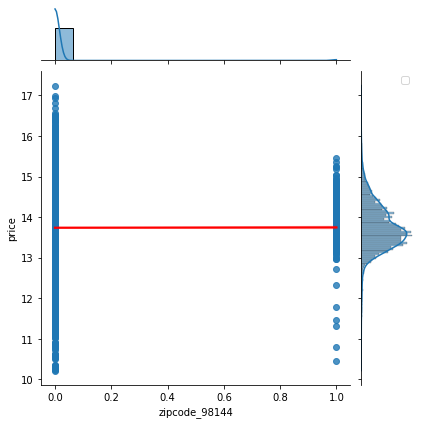

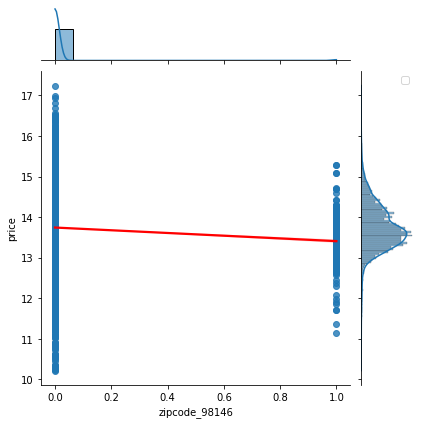

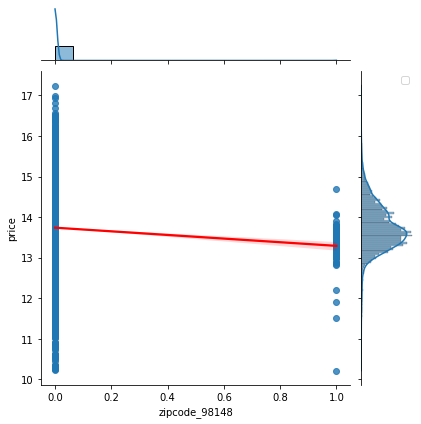

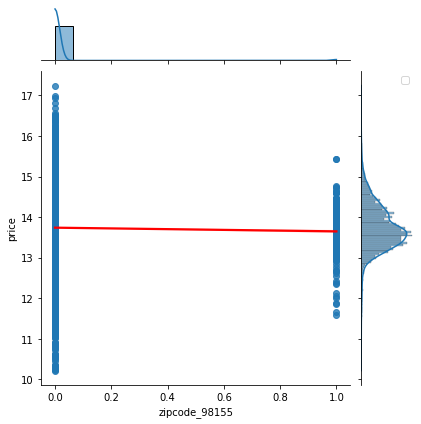

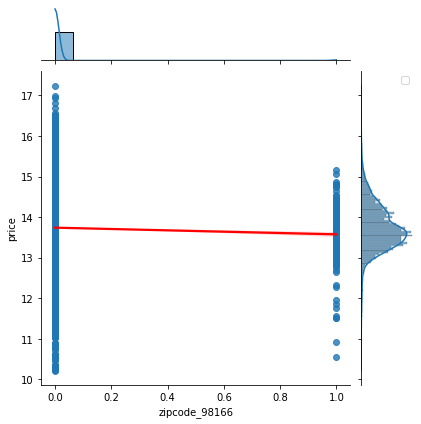

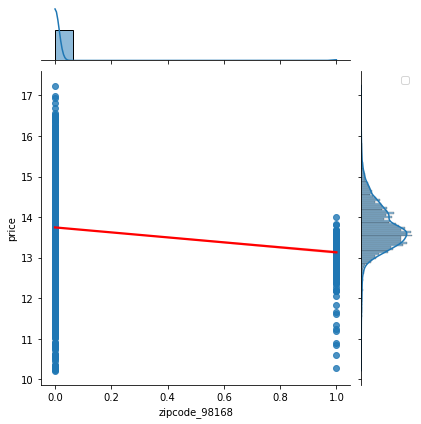

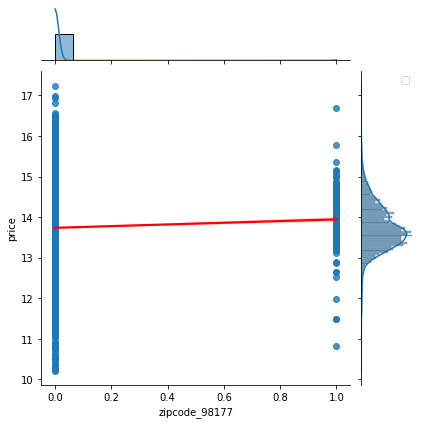

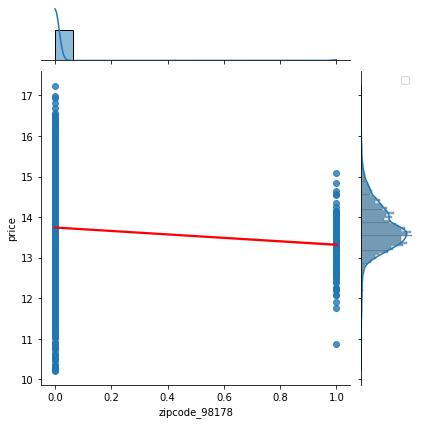

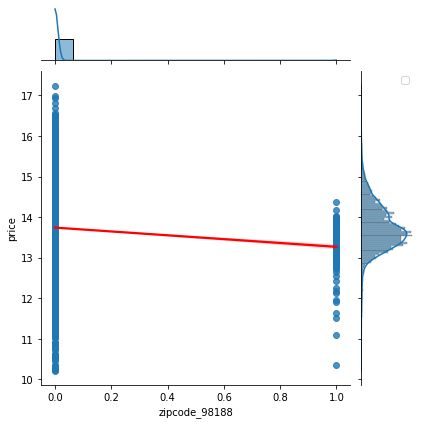

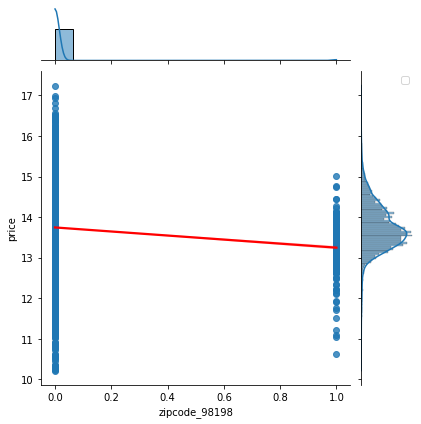

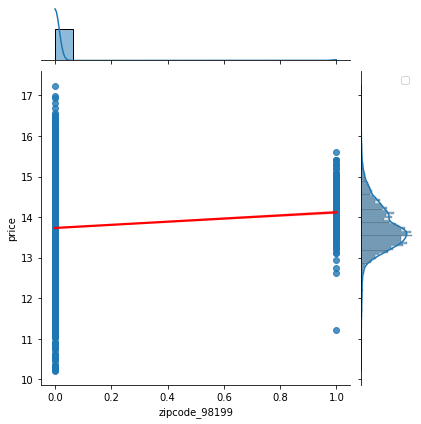

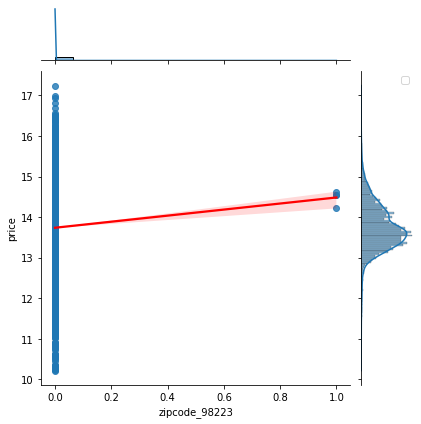

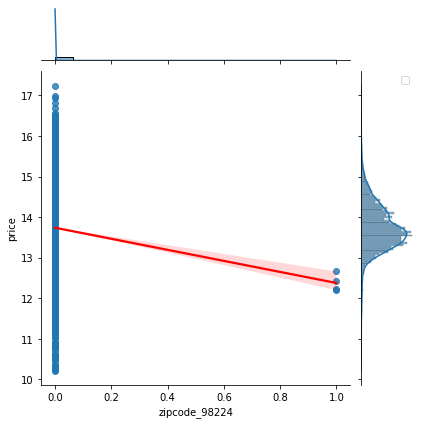

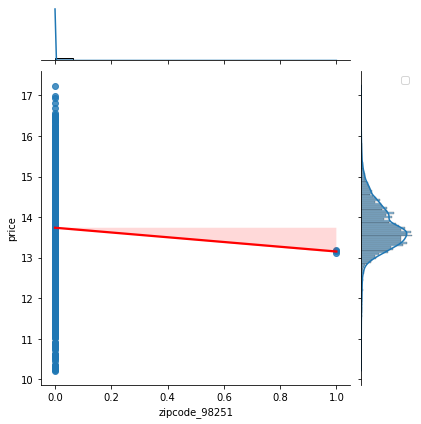

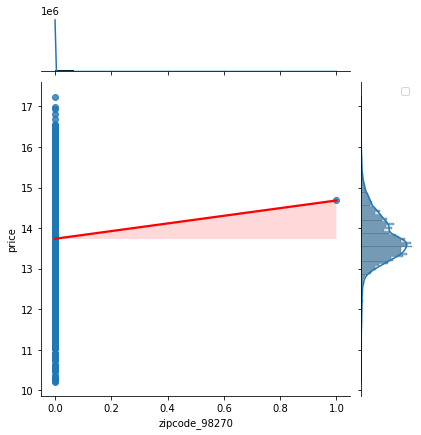

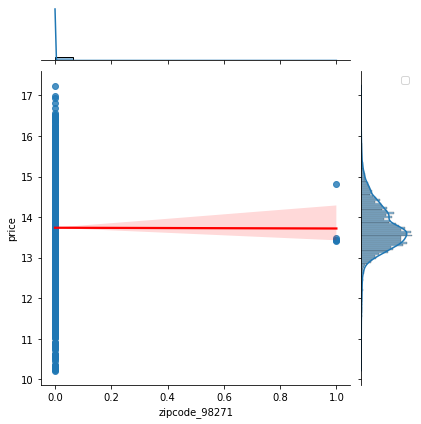

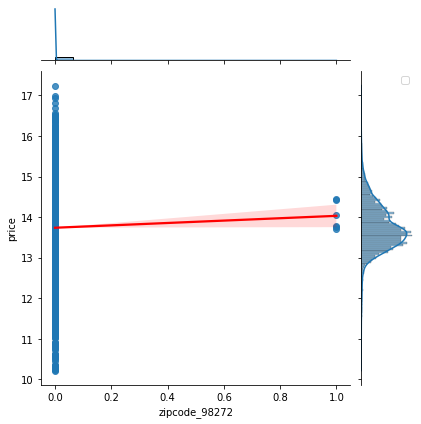

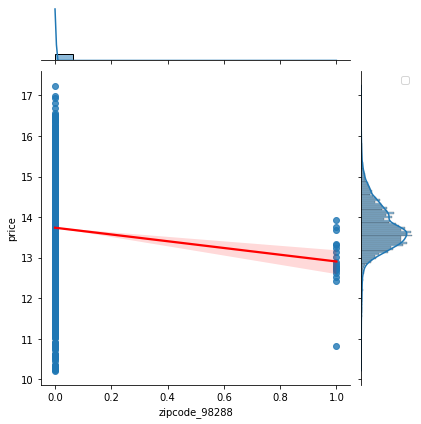

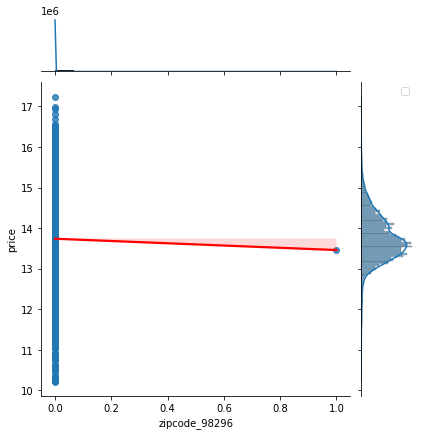

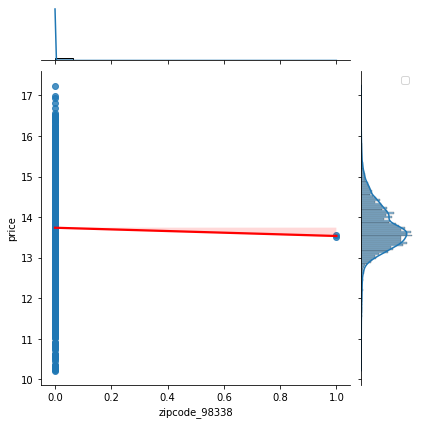

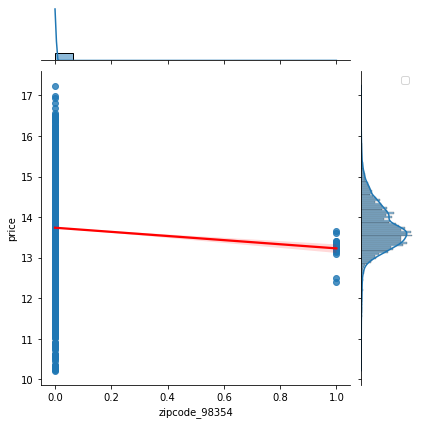

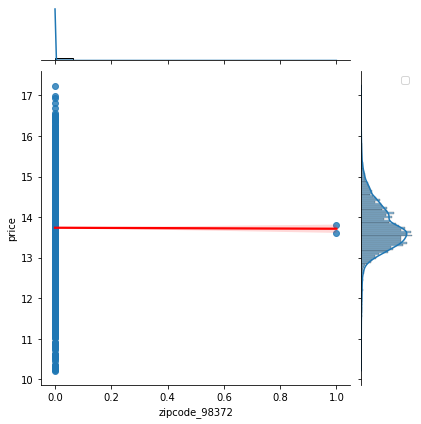

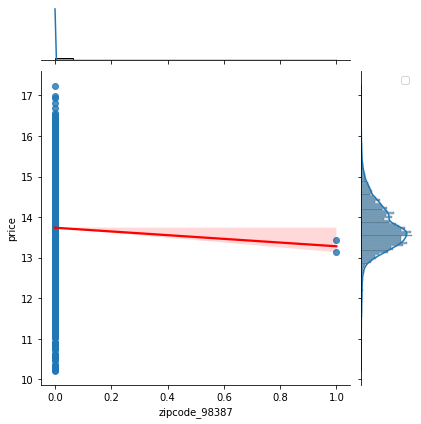

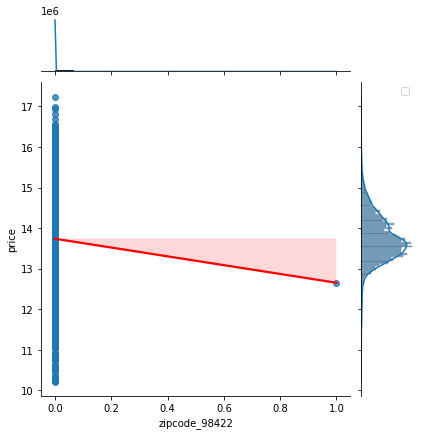

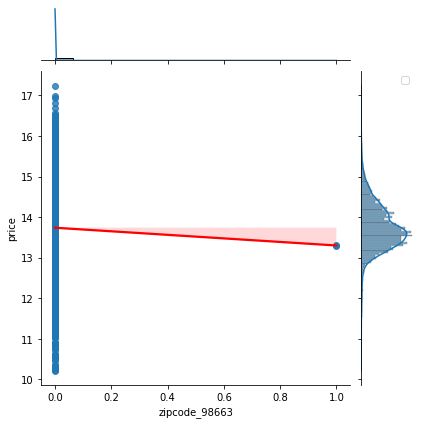

In [77]:
#Draw joint plots for categorical variables
dums = ['bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bathrooms_1.0',
       'bathrooms_1.5', 'bathrooms_2.0', 'bathrooms_2.5', 'bathrooms_3.0',
       'floors_1.5', 'floors_2.0', 'floors_2.5', 'floors_3.0', 'floors_3.5',
       'floors_4.0', 'waterfront_YES', 'greenbelt_YES', 'nuisance_YES',
       'view_EXCELLENT', 'view_FAIR', 'view_GOOD', 'view_NONE',
       'condition_Fair', 'condition_Good', 'condition_Poor',
       'condition_Very Good', 'grade_10 Very Good', 'grade_11 Excellent',
       'grade_12 Luxury', 'grade_13 Mansion', 'grade_2 Substandard',
       'grade_3 Poor', 'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average',
       'grade_7 Average', 'grade_8 Good', 'grade_9 Better',
       'heat_source_Electricity_Solar', 'heat_source_Gas',
       'heat_source_Gas_Solar', 'heat_source_Oil', 'heat_source_Oil_Solar',
       'heat_source_Other', 'sewer_system_PRIVATE RESTRICTED',
       'sewer_system_PUBLIC', 'sewer_system_PUBLIC RESTRICTED','zipcode_98002', 
        'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 
        'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 
        'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 
        'zipcode_98029', 'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 
        'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042',
        'zipcode_98045', 'zipcode_98047', 'zipcode_98050', 'zipcode_98051', 'zipcode_98052', 
        'zipcode_98053', 'zipcode_98055', 'zipcode_98056', 'zipcode_98057', 'zipcode_98058', 
        'zipcode_98059', 'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 
        'zipcode_98075', 'zipcode_98077', 'zipcode_98092', 'zipcode_98102', 'zipcode_98103', 
        'zipcode_98105', 'zipcode_98106', 'zipcode_98107', 'zipcode_98108', 'zipcode_98109', 
        'zipcode_98112', 'zipcode_98115', 'zipcode_98116', 'zipcode_98117', 'zipcode_98118', 
        'zipcode_98119', 'zipcode_98122', 'zipcode_98125', 'zipcode_98126', 'zipcode_98133', 
        'zipcode_98136', 'zipcode_98144', 'zipcode_98146', 'zipcode_98148', 'zipcode_98155', 
        'zipcode_98166', 'zipcode_98168', 'zipcode_98177', 'zipcode_98178', 'zipcode_98188', 
        'zipcode_98198', 'zipcode_98199', 'zipcode_98223', 'zipcode_98224', 'zipcode_98251', 
        'zipcode_98270', 'zipcode_98271', 'zipcode_98272', 'zipcode_98288', 'zipcode_98296', 
        'zipcode_98338', 'zipcode_98354', 'zipcode_98372', 'zipcode_98387', 'zipcode_98422', 
        'zipcode_98663']

for column in dums:
    sns.jointplot(x=column, y="price", data=data_preprocessed, kind='reg', label=column,joint_kws={'line_kws':{'color':'red'}})
    plt.legend()
    plt.savefig('/content/drive/MyDrive/Colab Notebooks/images/price_vs_cat_'+column+'.png')    
    plt.show()

###4.8.1 Feature Engineering 4 (Basement)
```
# Create a binary column on the preprocessed dataframe for whether a house  have basement or not so as to include that in the model.  
```

In [78]:
# create basement boolean column
data_preprocessed['basement'] = np.where((data_preprocessed['sqft_basement'] != 0), 1, 0)
data_preprocessed.head(2)

date      price  sqft_living  sqft_lot  sqft_above  sqft_basement  \
0 2022-05-24  13.422468     7.073270  8.873468    7.073270           1320   
1 2021-12-13  13.732129     7.926603  8.810310    7.358831           1320   

   sqft_garage  sqft_patio  yr_built  yr_renovated  \
0          689          40      1969          1998   
1          689         240      1950          1998   

                                             address        lat       long  \
0  2102 Southeast 21st Court, Renton, Washington ...  47.461975 -122.19052   
1  11231 Greenwood Avenue North, Seattle, Washing...  47.711525 -122.35591   

   age  total_sqft  bedrooms_2  bedrooms_3  bedrooms_4  bathrooms_1.0  \
0   53    9.026418           0           0           1              1   
1   48    9.156201           0           1           0              0   

   bathrooms_1.5  bathrooms_2.0  bathrooms_2.5  bathrooms_3.0  floors_1.5  \
0              0              0              0              0           0   
1              0              0              1              0           0   

   floors_2.0  floors_2.5  floors_3.0  floors_3.5  floors_4.0  waterfront_YES  \
0           0           0           0           0           0               0   
1           0           0           0           0           0               0   

   greenbelt_YES  nuisance_YES  view_EXCELLENT  view_FAIR  view_GOOD  \
0              0             0               0          0          0   
1              0             1               0          0          0   

   view_NONE  condition_Fair  condition_Good  condition_Poor  \
0          1               0               1               0   
1          0               0               0               0   

   condition_Very Good  grade_10 Very Good  grade_11 Excellent  \
0                    0                   0                   0   
1                    0                   0                   0   

   grade_12 Luxury  grade_13 Mansion  grade_2 Substandard  grade_3 Poor  \
0                0                 0                    0             0   
1                0                 0                    0             0   

   grade_4 Low  grade_5 Fair  grade_6 Low Average  grade_7 Average  \
0            0             0                    0                1   
1            0             0                    0                1   

   grade_8 Good  grade_9 Better  heat_source_Electricity_Solar  \
0             0               0                              0   
1             0               0                              0   

   heat_source_Gas  heat_source_Gas_Solar  heat_source_Oil  \
0                1                      0                0   
1                0                      0                1   

   heat_source_Oil_Solar  heat_source_Other  sewer_system_PRIVATE RESTRICTED  \
0                      0                  0                                0   
1                      0                  0                                0   

   sewer_system_PUBLIC  sewer_system_PUBLIC RESTRICTED  zipcode_98002  \
0                    1                               0              0   
1                    1                               0              0   

   zipcode_98003  zipcode_98004  zipcode_98005  zipcode_98006  zipcode_98007  \
0              0              0              0              0              0   
1              0              0              0              0              0   

   zipcode_98008  zipcode_98010  zipcode_98011  zipcode_98014  zipcode_98019  \
0              0              0              0              0              0   
1              0              0              0              0              0   

   zipcode_98022  zipcode_98023  zipcode_98024  zipcode_98027  zipcode_98028  \
0              0              0              0              0              0   
1              0              0              0              0              0   

   zipcode_98029  zipcode_98030  zipcode_98031  zipcode_98032  zip

## 5.0 Model Iteration

As stated above, I have decided to work with `total_sqft`,`sqft_living` and `bedroom_4` in lieu of `sqft_lot`,`sqft_above` and `bedroom_3` respectively.

Also Leaving `date`, `address`,`long` and `lat` out of the predictor variables as they are not much relevance in the model

In [79]:
data_preprocessed.columns

Index(['date', 'price', 'sqft_living', 'sqft_lot', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated',
       ...
       'zipcode_98272', 'zipcode_98288', 'zipcode_98296', 'zipcode_98338',
       'zipcode_98354', 'zipcode_98372', 'zipcode_98387', 'zipcode_98422',
       'zipcode_98663', 'basement'],
      dtype='object', length=149)

In [80]:
preds_cols_2 = ['sqft_living', 'sqft_basement', 'sqft_garage', 'sqft_patio', 'age', 'total_sqft',
       'bedrooms_2','bedrooms_4', 'bathrooms_1.0',
       'bathrooms_1.5', 'bathrooms_2.0', 'bathrooms_2.5', 'bathrooms_3.0',
       'floors_1.5', 'floors_2.0', 'floors_2.5', 'floors_3.0', 'floors_3.5',
       'floors_4.0', 'waterfront_YES', 'greenbelt_YES', 'nuisance_YES',
       'view_EXCELLENT', 'view_FAIR', 'view_GOOD', 'view_NONE',
       'condition_Fair', 'condition_Good', 'condition_Poor',
       'condition_Very Good', 'grade_10 Very Good', 'grade_11 Excellent',
       'grade_12 Luxury', 'grade_13 Mansion', 'grade_2 Substandard',
       'grade_3 Poor', 'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average',
       'grade_7 Average', 'grade_8 Good', 'grade_9 Better',
       'heat_source_Electricity_Solar', 'heat_source_Gas',
       'heat_source_Gas_Solar', 'heat_source_Oil', 'heat_source_Oil_Solar',
       'heat_source_Other', 'sewer_system_PRIVATE RESTRICTED',
       'sewer_system_PUBLIC', 'sewer_system_PUBLIC RESTRICTED','zipcode_98002', 
        'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 
        'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 
        'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 
        'zipcode_98029', 'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 
        'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042',
        'zipcode_98045', 'zipcode_98047', 'zipcode_98050', 'zipcode_98051', 'zipcode_98052', 
        'zipcode_98053', 'zipcode_98055', 'zipcode_98056', 'zipcode_98057', 'zipcode_98058', 
        'zipcode_98059', 'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 
        'zipcode_98075', 'zipcode_98077', 'zipcode_98092', 'zipcode_98102', 'zipcode_98103', 
        'zipcode_98105', 'zipcode_98106', 'zipcode_98107', 'zipcode_98108', 'zipcode_98109', 
        'zipcode_98112', 'zipcode_98115', 'zipcode_98116', 'zipcode_98117', 'zipcode_98118', 
        'zipcode_98119', 'zipcode_98122', 'zipcode_98125', 'zipcode_98126', 'zipcode_98133', 
        'zipcode_98136', 'zipcode_98144', 'zipcode_98146', 'zipcode_98148', 'zipcode_98155', 
        'zipcode_98166', 'zipcode_98168', 'zipcode_98177', 'zipcode_98178', 'zipcode_98188', 
        'zipcode_98198', 'zipcode_98199', 'zipcode_98223', 'zipcode_98224', 'zipcode_98251', 
        'zipcode_98270', 'zipcode_98271', 'zipcode_98272', 'zipcode_98288', 'zipcode_98296', 
        'zipcode_98338', 'zipcode_98354', 'zipcode_98372', 'zipcode_98387', 'zipcode_98422', 
        'zipcode_98663']
# preds_cols_2

In [81]:
y_2 = data_preprocessed['price']
X_2 = data_preprocessed[preds_cols_2]

model_2 = sm.OLS(y_2, sm.add_constant(X_2))
results_2 = model_2.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [82]:
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     524.3
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        00:45:32   Log-Likelihood:                -7606.5
No. Observations:               29241   AIC:                         1.549e+04
Df Residuals:                   29102   BIC:                         1.664e+04
Df Model:                         138                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

Evaluating Mean Absolute Error & Root Mean Square Error

In [83]:
lin_reg(X_2,y_2)

R_squared Score: 0.7131555970352482
Mean Absolute Error: 0.18845707778215848
Root Mean Squared Error test: 0.3138601432219513


LinearRegression()

### 5.1 Interpretation
- Our model is responsible for `71%` in price variability, and increase from the baseline model, but still quite low
- Model is good overall because the p-value of 0.00 is less that 0.05
- Interpreting the constatnt and some of the Coefficients:
  - If all predictorsn are 0, the price of house will be `10.08 USD`
- MAE means that our model is off by `0.2 USD` 


### 5.1 Model Validation
`I will try some different feature selection techniques before fitting model with whole set.`

#### 5.2.1 Recursive Feature Eliminator

5.2.1.1 RFECV

In [84]:
# Create recursive feature eliminator that scores features by mean squared errors
from sklearn.feature_selection import RFECV
from sklearn import linear_model
ols = linear_model.LinearRegression()
selector = RFECV(estimator=ols, step=1, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit recursive feature eliminator 
selector.fit(X_2, y_2)

RFECV(cv=5, estimator=LinearRegression(), n_jobs=-1,
      scoring='neg_mean_squared_error')

In [85]:
selected_rfe = X_2.columns[selector.support_]
removed_rfe = X_2.columns[~selector.support_]

In [86]:
print(len(list(selected_rfe)))
print(len(list(removed_rfe)))

136
2


In [87]:
selected_rfe

Index(['sqft_living', 'sqft_basement', 'age', 'total_sqft', 'bedrooms_2',
       'bedrooms_4', 'bathrooms_1.0', 'bathrooms_1.5', 'bathrooms_2.0',
       'bathrooms_2.5',
       ...
       'zipcode_98271', 'zipcode_98272', 'zipcode_98288', 'zipcode_98296',
       'zipcode_98338', 'zipcode_98354', 'zipcode_98372', 'zipcode_98387',
       'zipcode_98422', 'zipcode_98663'],
      dtype='object', length=136)

In [88]:
removed_rfe

Index(['sqft_garage', 'sqft_patio'], dtype='object')

5.2.1.2 KBest Test

In [89]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
selector = SelectKBest(f_regression, k=138) #k is the number of predictor to select
selector.fit(X_2, y_2)

SelectKBest(k=138, score_func=<function f_regression at 0x7f328823b440>)

In [90]:
selected_columns = X_2.columns[selector.get_support()]
removed_columns = X_2.columns[~selector.get_support()]

In [91]:
# check removed columns
removed_columns

Index([], dtype='object')

In [92]:
# check selected columns
selected_columns

Index(['sqft_living', 'sqft_basement', 'sqft_garage', 'sqft_patio', 'age',
       'total_sqft', 'bedrooms_2', 'bedrooms_4', 'bathrooms_1.0',
       'bathrooms_1.5',
       ...
       'zipcode_98271', 'zipcode_98272', 'zipcode_98288', 'zipcode_98296',
       'zipcode_98338', 'zipcode_98354', 'zipcode_98372', 'zipcode_98387',
       'zipcode_98422', 'zipcode_98663'],
      dtype='object', length=138)

### 6.0 Final Model

In [93]:
y_3 = target_3 = data_preprocessed['price']
#X_3 = data_preprocessed[selected_columns] #for KBest
X_3 = data_preprocessed[selected_rfe]  #for RFECV

model_3 = sm.OLS(y_3, sm.add_constant(X_3))
results_3 = model_3.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [94]:
print(results_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     531.9
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        00:46:14   Log-Likelihood:                -7609.2
No. Observations:               29241   AIC:                         1.549e+04
Df Residuals:                   29104   BIC:                         1.663e+04
Df Model:                         136                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

Evaluating Mean Absolute Error & Root Mean Square Error

In [95]:
lin_reg(X_3,y_3)

R_squared Score: 0.7131022568328674
Mean Absolute Error: 0.1884752511005938
Root Mean Squared Error test: 0.31388932382504525


LinearRegression()

### 6.1 Interpretation
- Our model is responsible for `72%` in price variability, and increase from the baseline model.
- Model is good overall because the p-value of 0.00 is less that 0.05
- Interpreting the constatnt and some of the Coefficients:
  - If all predictors are 0, the price of house will be `10.15 USD`
  - For every sqft increase in sqft_living, we have over `0.36 USD` increase in price

- *Bedrooms*
-- Because 1 does not appear in our one-hot encoded variable for bedroom (we only have `bedrooms_2`,`bedrooms_3`,`bedrooms_4`,`bedrooms_5` & `bedrooms_6`), we know that 1 is the reference category. Thus we can interpret the coefficients of `bedrooms_2`,`bedrooms_3`,`bedrooms_4`,`bedrooms_5` & `bedrooms_6` as follows:
-- Compared to a house with one bedroom, we see an associated decrease of `0.036 USD` in houses with 2 bedrooms, and an increase of `0.01 USD` in houses with 4 bedrooms and so on. 
- The negative correlation doesnt seem probable which is an indication that further extensive analysis of the predictor is required.
- MAE means that our model is off by `0.2 USD` which is quite good compare to first model iteration.

####Review Feature importance from coefficients for Model2 & Final Model:




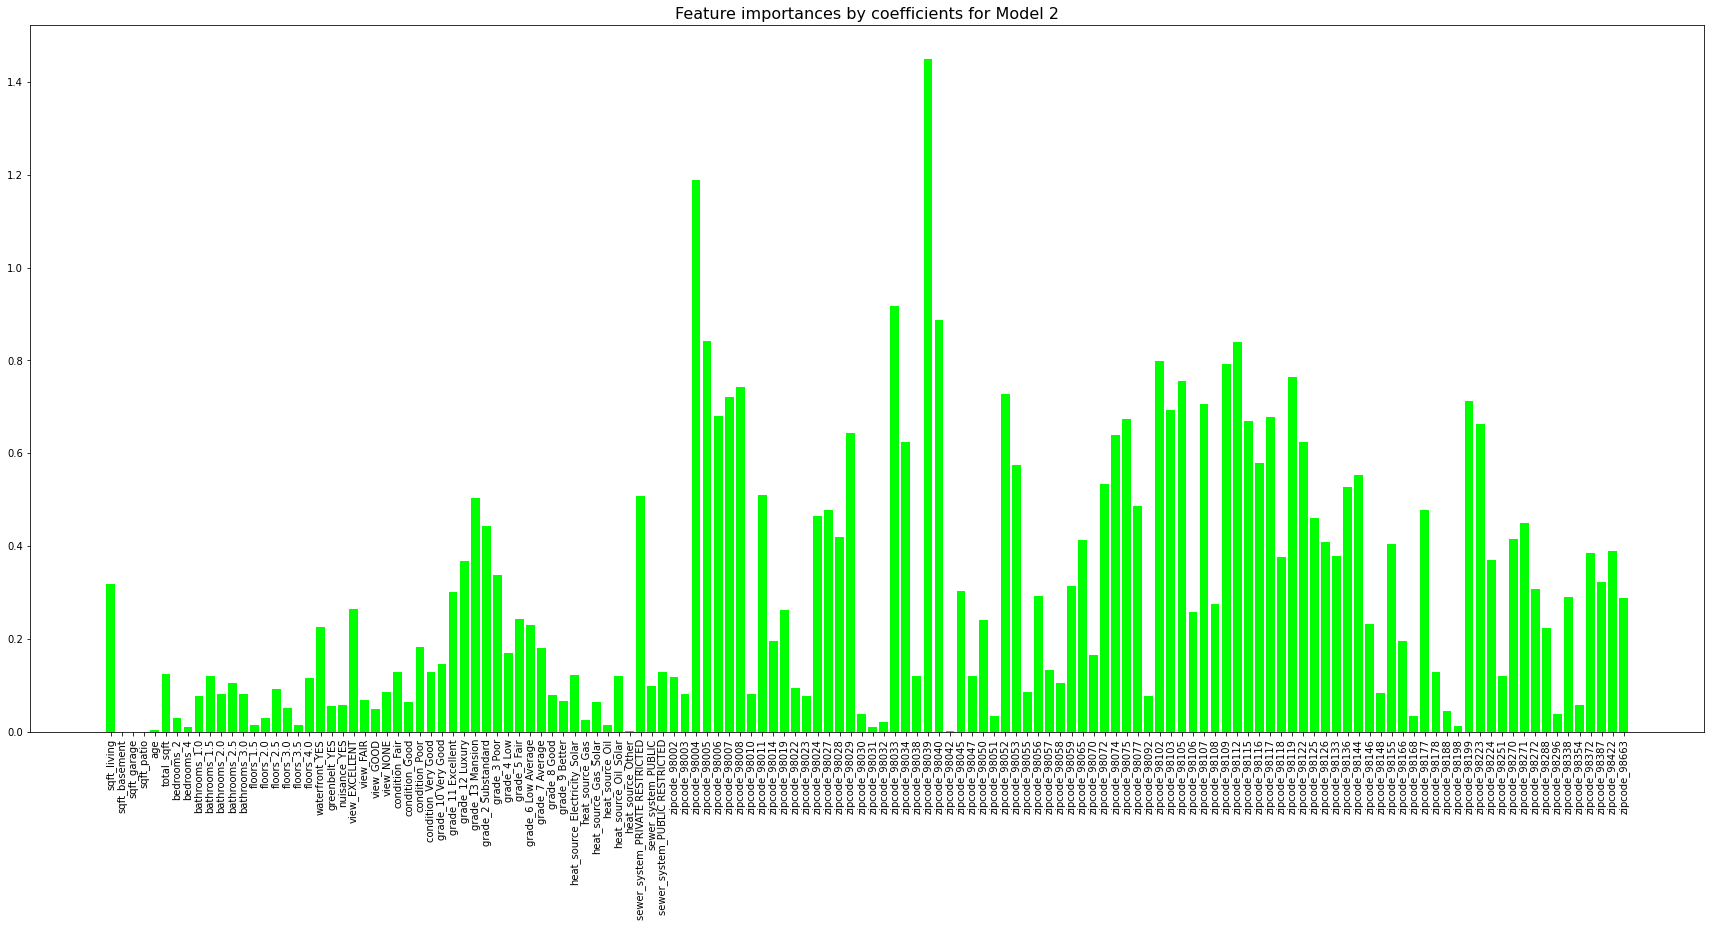

In [96]:
# Visualize important features by coefficients in Model 2
from sklearn.linear_model import RidgeCV
ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X_2, y_2)
importance = np.abs(ridge.coef_)
feature_names = X_2.columns
plt.figure(figsize=(30,13))
plt.bar(height=importance, x=feature_names, color="lime")
plt.xticks(rotation = 90, fontsize=10, fontname='silom')
plt.yticks(fontsize=10, fontname='silom')
plt.title('Feature importances by coefficients for Model 2', fontsize=16, fontname='silom' )
plt.savefig('/content/drive/MyDrive/Colab Notebooks/images/model2_featureImportance_by_coefs.png')

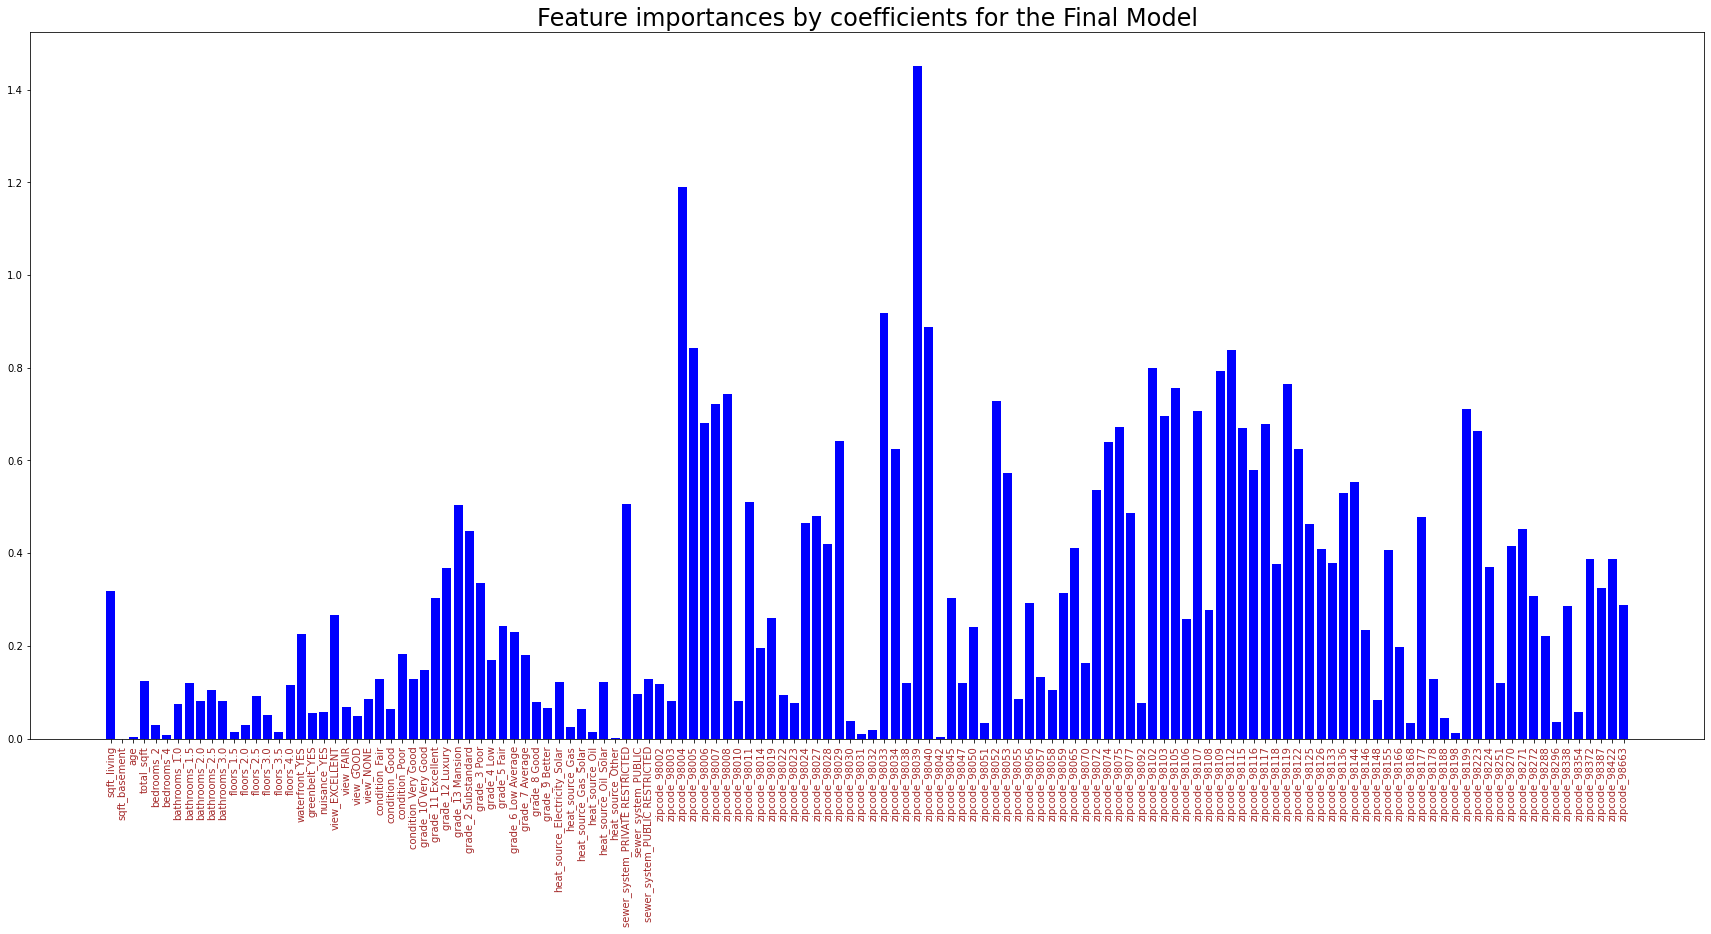

In [97]:
# Visualize important features by coefficients in Final Model
from sklearn.linear_model import RidgeCV
ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X_3, y_3)
importance = np.abs(ridge.coef_)
feature_names = X_3.columns
plt.figure(figsize=(30,13))
plt.bar(height=importance, x=feature_names, color="blue")
plt.xticks(rotation = 90, fontsize=10, fontname='silom', color="brown")
plt.yticks(fontsize=10, fontname='silom')
plt.title('Feature importances by coefficients for the Final Model', fontsize=24, fontname='silom' )
plt.savefig('/content/drive/MyDrive/Colab Notebooks/images/final_model_feature_importance_by_coefs.png')

Observation
- In the chart for Model2, `sqft_basement`,`sqft_garage` and `sqft_patio` had no relevance
- Applying RFECV in Final model identified and take out `sqft_garage` and `sqft_patio` automatically in what reduced the complexity of the model by two predictors while perform as well as Model 2


## Regression Results

- Final model which is based on recursive feature elimination resulting in less complexity performs as well as Model2 with more predictors.
- This is demonstration a good trade-off between model complexity and Higher R-Squared
- I built a 4th model in the exploratory notebook to eliminate coeeficients with high p-values from Model 2, P-values also dipped with few floating points
- This might support the notion that more fesatures leads to higher R-square
- Having created models with different K-value using KBest recursive feature elimination such as 75, 100, 120 and so on, I found that using all predictors (138) has the highest number of R-square.
- Model 2 and the final model have about thesame Mean Absolute Error of abou 0.3 USD which is a lot better than from the baseline model




## Conclusion
- The model is not exceptional in analysing the predictors, and have some limitations, so if business decision is to be made, further extensive review and analysis of the each features has to be conducted.
- What these models emphasize is an high-level relationship of the features relative to house prices.
- From the feature importance visualisation, house grade variation seem to be of highest importance as well as total square foot of the living space.
- Feature importance analysis also suggests that number of bathrooms as well as having a waterview are somewhat important.
- Based on the analysis on this particular, I can  recommend that homeowners who are interested in selling their homes at a higher price should focus on expanding square footage, and improving the quality of construction and consider waterview